## **<center><h1> PROJET DE SÉRIES CHRONOLOGIQUES (en utilisant les 1-6-12 derniers mois)  </h1></center>**



<center><h5> Marceau Billon, Hugo Lacauste, Toufik Cheikh. </h5></center>


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>




**<h1> <span style="color: #fb4141">Introduction</span> </h1>**

Cet ensemble de données décrit les anomalies mensuelles des températures globales des océans de $Janvier$ $1880$ à $Aout$ $2019$. __Ces anomalies sont basés sur la moyenne du $20$ème siècle__ (jeu de données trouvé sur : https://www.ncdc.noaa.gov/cag/global/time-series/globe/ocean/all/8/1880-2019).
<br/>
<br/>
La différence de température est exprimée en degrés-celsius et il y a $1676$ observations ($12$ mois de $1880$ à $2019$, et en $2019$ les relevés s'arretent en $Aout$). Ce jeu de données provient du National Centers for Environmental Information (NCEI), et plus précisement du National Oceanic and Atmospheric Administration.
<br/>
<br/>
Ici notre objectif sera de prédire les anomalies futures par décennie, qui seront primordiales pour étudier le réchauffement climatique, qui est une question centrale de notre société actuelle. En effet, le réchauffement océanique est à la source des changements climatiques planétaires, car ces étendues d'eau salée absorbent plus de $90$ % de l’énergie attribuable au réchauffement planétaire.
<br/>
<br/>
> Nous commencerons par une prédiction classique à 1 pas, puis nous effectuerons une prédiction en tenant compte des 6 derniers mois, et enfin en regardant ce qui s'est passé la dernière année. Et pour chacune des ces prédictions, nous effectuerons une prédiction future à l'horizon $2050$, et nous comparerons.

A noter que nous détaillerons chaque graphique pour la partie 1, commenterons chaque résultat, la même logique s'appliquera pour les parties 2 et 3.

**<h1> <span style="color: #fb4141">Modules nécessaires pour ce projet</span> </h1>**

In [1]:
%matplotlib inline
from IPython.display import Image
from IPython.core.display import HTML 
import os
import math 
import random
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import *
import scipy
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import datetime


import statistics
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.tsatools import detrend
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.adfvalues import mackinnonp
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.graphics.api import qqplot
from statistics import mean
from sklearn.metrics import r2_score

from statsmodels.tsa.stattools import acf, pacf, kpss, adfuller, arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats, signal
from sklearn.metrics import mean_squared_error
from statsmodels.graphics import tsaplots
import itertools
import warnings
import time

**<h1><center> <span style="color: #B014BA">PREMIERE PARTIE : PREDICTION CLASSIQUE A UN PAS</span> </center></h1>**

> Dans cette partie, nous allons tenter de prédire **en utilisant seulement le mois précédent**. C'est à dire que pour prédire Juin par exemple, nous utilisons que Mai.

**<h1> <span style="color: #fb4141">1. Premières étapes<span style="color: #fb4141"> </h1>**

**<h2> <span style="color: #008000">1.1 Importation des données</h2>**

In [2]:
degres = pd.read_csv('ocean.txt', index_col = 0)
degres = np.array(degres).flatten()

df = pd.DataFrame(pd.read_csv('ocean.txt'))

**<h2> <span style="color: #008000">1.2 Analyse descriptive</span> </h2>**


In [3]:
#Création des données décennie par décennie
df18801890 = df[:120]

df18901900 = df[120:240]

df19001910 = df[240:360]

df19101920 = df[360:480]

df19201930 = df[480:600]

df19301940 = df[600:720]

df19401950 = df[720:840]

df19501960 = df[840:960]

df19601970 = df[960:1080]

df19701980 = df[1080:1200]

df19801990 = df[1200:1320]

df19902000 = df[1320:1440]

df20002010 = df[1440:1560]

df20102019 = df[1560:]

**<h3> <span style="color: #1A54A4">1.2.1 Graphiques</span> </h3>**

> Nous avons affiché les données sous forme graphique, en simplifiant la visualisation de celui ci avec des codes couleurs par décennie.

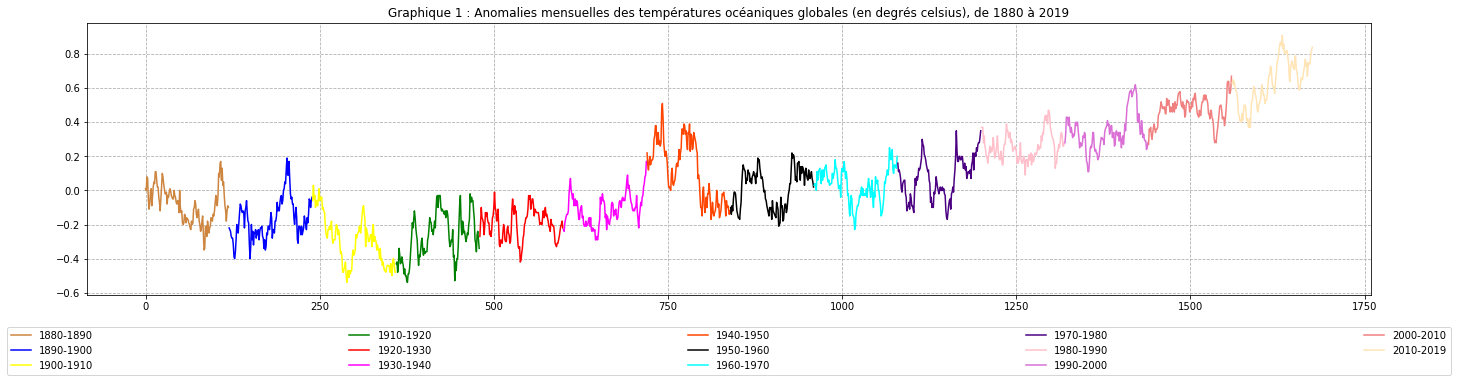

In [4]:
plt.figure(figsize=(23,5))
plt.grid(linestyle='--')

plt.plot(df18801890['Value'],color="peru", label="1880-1890")
plt.plot(df18901900['Value'],color="blue", label="1890-1900")
plt.plot(df19001910['Value'],color="yellow", label="1900-1910")
plt.plot(df19101920['Value'],color="green", label="1910-1920")
plt.plot(df19201930['Value'],color="red", label="1920-1930")
plt.plot(df19301940['Value'],color="fuchsia", label="1930-1940")
plt.plot(df19401950['Value'],color="orangered", label="1940-1950")
plt.plot(df19501960['Value'],color="black", label="1950-1960")
plt.plot(df19601970['Value'],color="aqua", label="1960-1970")
plt.plot(df19701980['Value'],color="indigo", label="1970-1980")
plt.plot(df19801990['Value'],color="pink", label="1980-1990")
plt.plot(df19902000['Value'],color="orchid", label="1990-2000")
plt.plot(df20002010['Value'],color="lightcoral", label="2000-2010")
plt.plot(df20102019['Value'],color="moccasin", label="2010-2019")
plt.title('Graphique 1 : Anomalies mensuelles des températures océaniques globales (en degrés celsius), de 1880 à 2019')
plt.legend(loc=8, mode="expand", ncol=5, borderaxespad=-8)
plt.show()

Dans ce premier graphique, nous voyons une tendance globale à la hausse à partir de la décennie $1910-1920$, et une non-stationnarité assez évidente. Nous confirmerons ou non ces intuitions dans la partie $2.1$ et $2.3$, lors de l'étude de notre série temporelle.

> Maintenant, nous allons faire très brièvement de la statistique descriptive de notre jeu de données pour mieux le connaître, et ainsi avoir une vision globale de celui ci. Par exemple, nous avons voulu nous intéresser aux moyennes des anomalies de températures, et les comparer entres elles.


Anomalie moyenne des températures océaniques de la décennie 1900-1910 =  -0.29466666666666674
Anomalie moyenne des températures océaniques de la décennie 2010-2019 =  0.632758620689655


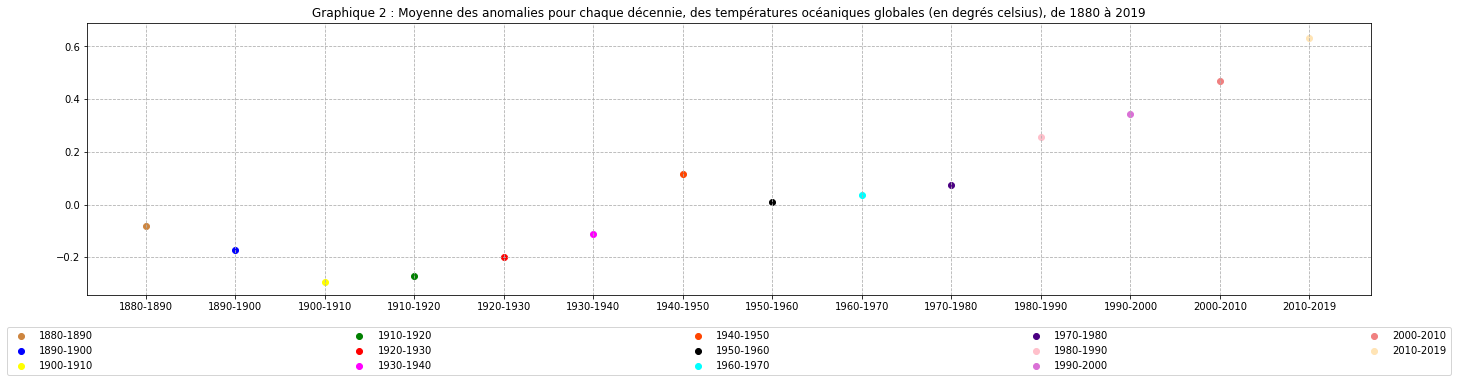

In [5]:
x1 = "1880-1890"
y1 = df18801890["Value"].mean()

x2 = "1890-1900"
y2 = df18901900["Value"].mean()

x3 = "1900-1910"
y3 = df19001910["Value"].mean()
print("Anomalie moyenne des températures océaniques de la décennie 1900-1910 = ", y3)

x4 = "1910-1920"
y4 = df19101920["Value"].mean()

x5 = "1920-1930"
y5 = df19201930["Value"].mean()

x6 = "1930-1940"
y6 = df19301940["Value"].mean()

x7 = "1940-1950"
y7 = df19401950["Value"].mean()

x8 = "1950-1960"
y8 = df19501960["Value"].mean()

x9 = "1960-1970"
y9 = df19601970["Value"].mean()

x10 = "1970-1980"
y10 = df19701980["Value"].mean()

x11 = "1980-1990"
y11 = df19801990["Value"].mean()

x12 = "1990-2000"
y12 = df19902000["Value"].mean()

x13 = "2000-2010"
y13 = df20002010["Value"].mean()

x14 = "2010-2019"
y14 = df20102019["Value"].mean()
print("Anomalie moyenne des températures océaniques de la décennie 2010-2019 = ", y14)

plt.figure(figsize=(23,5))
plt.grid(linestyle='--')
plt.scatter(x1, y1, color="peru", label="1880-1890")
plt.scatter(x2, y2, color="blue", label="1890-1900")
plt.scatter(x3, y3, color="yellow", label="1900-1910")
plt.scatter(x4, y4, color="green", label="1910-1920")
plt.scatter(x5, y5, color="red", label="1920-1930")
plt.scatter(x6, y6, color="fuchsia", label="1930-1940")
plt.scatter(x7, y7, color="orangered", label="1940-1950")
plt.scatter(x8, y8, color="black", label="1950-1960")
plt.scatter(x9, y9, color="aqua", label="1960-1970")
plt.scatter(x10, y10, color="indigo", label="1970-1980")
plt.scatter(x11, y11, color="pink", label="1980-1990")
plt.scatter(x12, y12, color="orchid", label="1990-2000")
plt.scatter(x13, y13, color="lightcoral", label="2000-2010")
plt.scatter(x14, y14, color="moccasin", label="2010-2019")
plt.title('Graphique 2 : Moyenne des anomalies pour chaque décennie, des températures océaniques globales (en degrés celsius), de 1880 à 2019')
plt.legend(loc=8, mode="expand", ncol=5, borderaxespad=-8)
plt.show()

Nous pouvons ainsi voir qu'en moyenne la décennie $1900-1910$ a eu une anomalie négative, donc la température océanique de cette décennie-ci a été plus basse que la moyenne du 20ième siècle, de $0.29$ degrès. Tandis que la décennie $2010-2019$ a elle, eu une anomalie moyenne de l'ordre de $0.63$ degrés celsius au dessus de la moyenne centenaire.

> Puis, nous avons regardé le minimum observé des anomalies océaniques sur chaque décennie.

Anomalie minimale des températures océaniques de la décennie 1900-1910 =  -0.54
Anomalie minimale des températures océaniques de la décennie 1910-1920 =  -0.54
Anomalie minimale des températures océaniques de la décennie 2010-2019 =  0.37


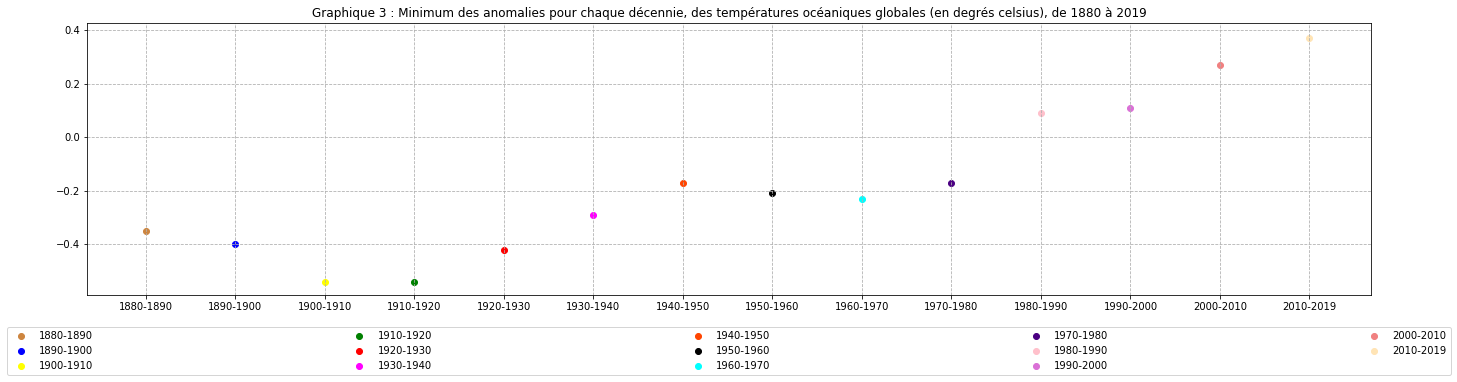

In [6]:
x1 = "1880-1890"
y1 = df18801890["Value"].min()

x2 = "1890-1900"
y2 = df18901900["Value"].min()

x3 = "1900-1910"
y3 = df19001910["Value"].min()
print("Anomalie minimale des températures océaniques de la décennie 1900-1910 = ", y3)

x4 = "1910-1920"
y4 = df19101920["Value"].min()
print("Anomalie minimale des températures océaniques de la décennie 1910-1920 = ", y4)

x5 = "1920-1930"
y5 = df19201930["Value"].min()

x6 = "1930-1940"
y6 = df19301940["Value"].min()

x7 = "1940-1950"
y7 = df19401950["Value"].min()

x8 = "1950-1960"
y8 = df19501960["Value"].min()

x9 = "1960-1970"
y9 = df19601970["Value"].min()

x10 = "1970-1980"
y10 = df19701980["Value"].min()

x11 = "1980-1990"
y11 = df19801990["Value"].min()

x12 = "1990-2000"
y12 = df19902000["Value"].min()

x13 = "2000-2010"
y13 = df20002010["Value"].min()

x14 = "2010-2019"
y14 = df20102019["Value"].min()
print("Anomalie minimale des températures océaniques de la décennie 2010-2019 = ", y14)


plt.figure(figsize=(23,5))
plt.grid(linestyle='--')
plt.scatter(x1, y1, color="peru", label="1880-1890")
plt.scatter(x2, y2, color="blue", label="1890-1900")
plt.scatter(x3, y3, color="yellow", label="1900-1910")
plt.scatter(x4, y4, color="green", label="1910-1920")
plt.scatter(x5, y5, color="red", label="1920-1930")
plt.scatter(x6, y6, color="fuchsia", label="1930-1940")
plt.scatter(x7, y7, color="orangered", label="1940-1950")
plt.scatter(x8, y8, color="black", label="1950-1960")
plt.scatter(x9, y9, color="aqua", label="1960-1970")
plt.scatter(x10, y10, color="indigo", label="1970-1980")
plt.scatter(x11, y11, color="pink", label="1980-1990")
plt.scatter(x12, y12, color="orchid", label="1990-2000")
plt.scatter(x13, y13, color="lightcoral", label="2000-2010")
plt.scatter(x14, y14, color="moccasin", label="2010-2019")
plt.title('Graphique 3 : Minimum des anomalies pour chaque décennie, des températures océaniques globales (en degrés celsius), de 1880 à 2019')
plt.legend(loc=8, mode="expand", ncol=5, borderaxespad=-8)
plt.show()

Nous retrouvons logiquement les minimums de chaque décennie du graphique 1. Et nous pouvons noter qu'à partir de la décennie $1980$, les anomalies minimales observées sont malgré tout supérieures à la moyenne du siècle.

</br>
</br>

Nous réitérons ceci avec le maximum :

Anomalie maximale des températures océaniques de la décennie 1970-1980 =  0.35


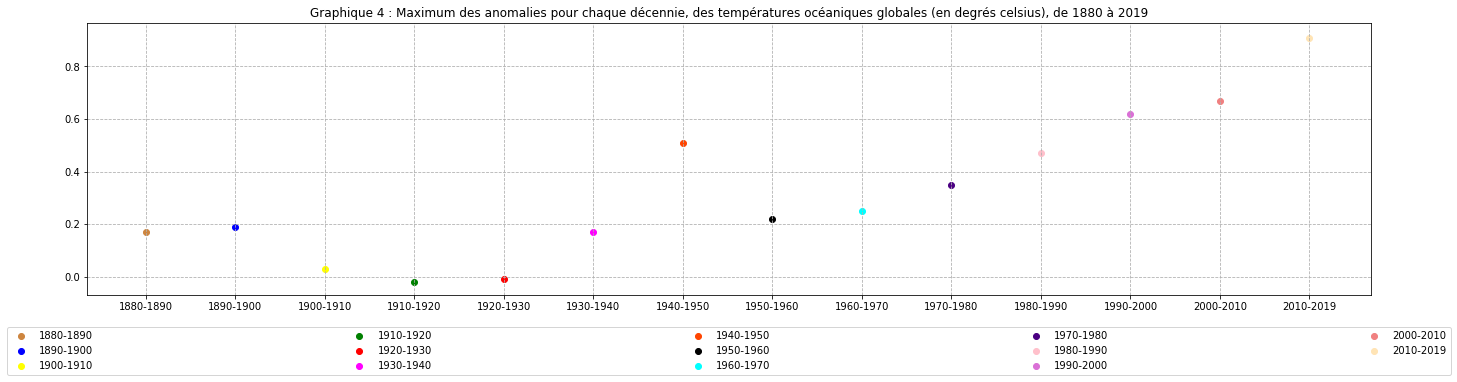

In [7]:
x1 = "1880-1890"
y1 = df18801890["Value"].max()

x2 = "1890-1900"
y2 = df18901900["Value"].max()

x3 = "1900-1910"
y3 = df19001910["Value"].max()

x4 = "1910-1920"
y4 = df19101920["Value"].max()

x5 = "1920-1930"
y5 = df19201930["Value"].max()

x6 = "1930-1940"
y6 = df19301940["Value"].max()

x7 = "1940-1950"
y7 = df19401950["Value"].max()

x8 = "1950-1960"
y8 = df19501960["Value"].max()

x9 = "1960-1970"
y9 = df19601970["Value"].max()

x10 = "1970-1980"
y10 = df19701980["Value"].max()
print("Anomalie maximale des températures océaniques de la décennie 1970-1980 = ", y10)

x11 = "1980-1990"
y11 = df19801990["Value"].max()

x12 = "1990-2000"
y12 = df19902000["Value"].max()

x13 = "2000-2010"
y13 = df20002010["Value"].max()

x14 = "2010-2019"
y14 = df20102019["Value"].max()

plt.figure(figsize=(23,5))
plt.grid(linestyle='--')
plt.scatter(x1, y1, color="peru", label="1880-1890")
plt.scatter(x2, y2, color="blue", label="1890-1900")
plt.scatter(x3, y3, color="yellow", label="1900-1910")
plt.scatter(x4, y4, color="green", label="1910-1920")
plt.scatter(x5, y5, color="red", label="1920-1930")
plt.scatter(x6, y6, color="fuchsia", label="1930-1940")
plt.scatter(x7, y7, color="orangered", label="1940-1950")
plt.scatter(x8, y8, color="black", label="1950-1960")
plt.scatter(x9, y9, color="aqua", label="1960-1970")
plt.scatter(x10, y10, color="indigo", label="1970-1980")
plt.scatter(x11, y11, color="pink", label="1980-1990")
plt.scatter(x12, y12, color="orchid", label="1990-2000")
plt.scatter(x13, y13, color="lightcoral", label="2000-2010")
plt.scatter(x14, y14, color="moccasin", label="2010-2019")
plt.title('Graphique 4 : Maximum des anomalies pour chaque décennie, des températures océaniques globales (en degrés celsius), de 1880 à 2019')
plt.legend(loc=8, mode="expand", ncol=5, borderaxespad=-8)
plt.show()

Ce graphique couplé au 3ième est très interessant : en effet, nous remarquons que les anomalies positives les plus importantes observées (celles qui sont donc synonymes de réchauffement climatique) durant les décennies $1880-1940$ ainsi que $1950-1980$ sont quand meme en dessous de la plus petite anomalie observée de la décennie $2010-2019$ (inférieur à $+0.37$). 

</br>

Autrement dit la décennie $2010-2019$, à son anomalie la plus basse, était malgré tout plus importante que les décennies citées plus haut, à leur anomalie respective la plus haute.

**<h3> <span style="color: #1A54A4">1.2.2 Histogramme</span> </h3>**

> Nous cloturons cette partie d'analyse descriptive simple avec un histogramme pour observer les fréquences de chaque anomalie.

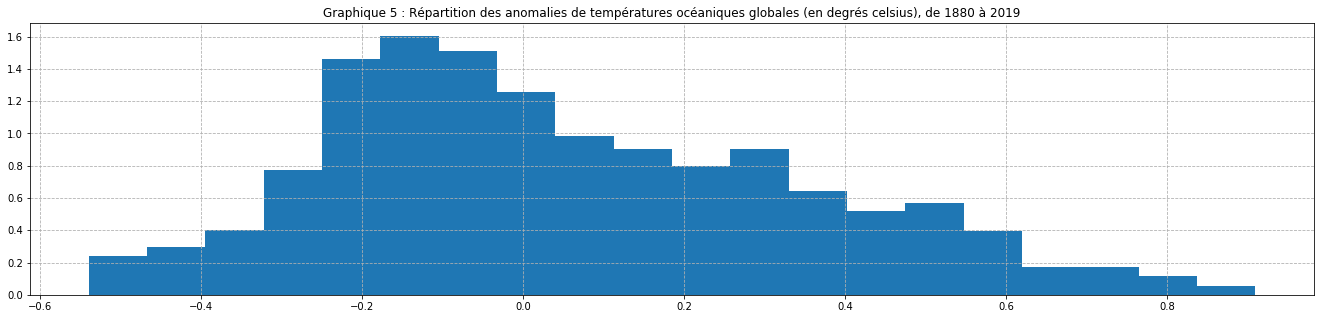

In [8]:
plt.figure(figsize=(23,5))
plt.grid(linestyle='--')
plt.hist(degres,bins=20,density=True)
plt.title('Graphique 5 : Répartition des anomalies de températures océaniques globales (en degrés celsius), de 1880 à 2019')
plt.show()

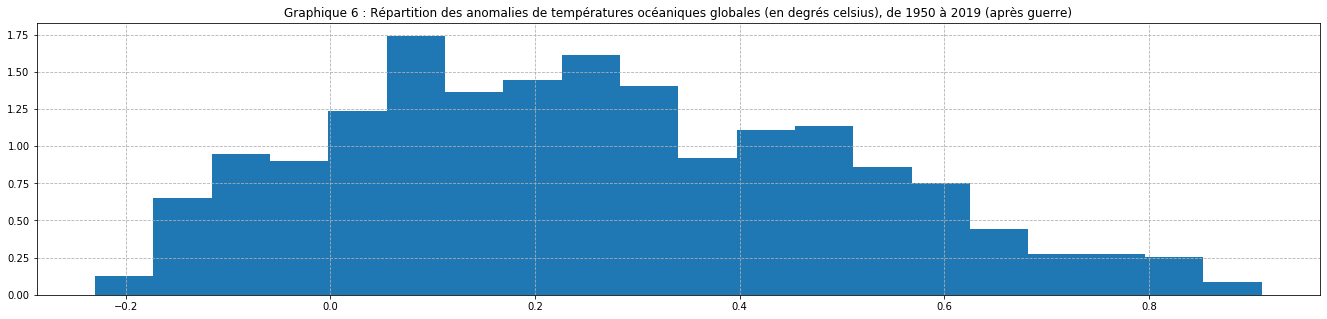

In [9]:
plt.figure(figsize=(23,5))
plt.grid(linestyle='--')
plt.hist(degres[840:],bins=20,density=True)
plt.title('Graphique 6 : Répartition des anomalies de températures océaniques globales (en degrés celsius), de 1950 à 2019 (après guerre)')
plt.show()

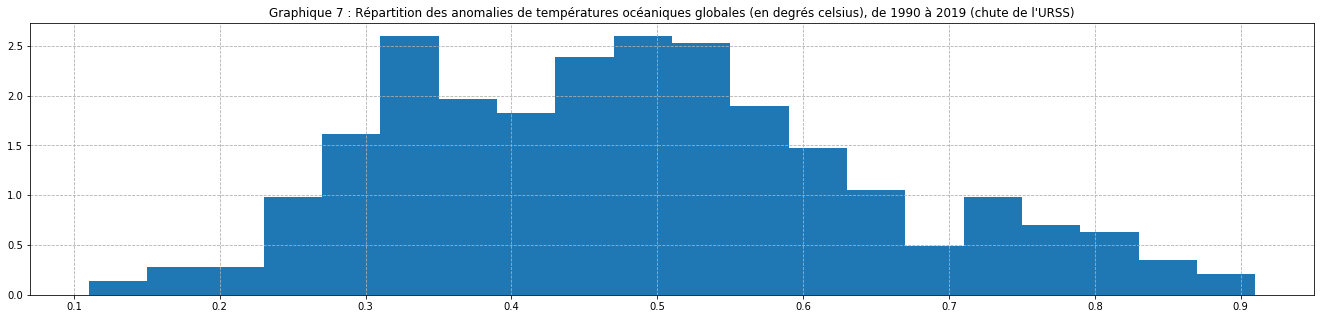

In [10]:
plt.figure(figsize=(23,5))
plt.grid(linestyle='--')
plt.hist(degres[1320:],bins=20,density=True)
plt.title("Graphique 7 : Répartition des anomalies de températures océaniques globales (en degrés celsius), de 1990 à 2019 (chute de l'URSS)")
plt.show()

Cette sous partie nous sert juste à visualiser la fréquence des anomalies sur le graphique 5. Et ensuite nous nous sommes juste amusés à faire l'histogramme à partir d'une certaine décennie qui correpondait à de gros changement sur le mode de vie pouvant augmenter la pollution et ainsi le réchauffement des températures océaniques : l'après guerre pour le graphique 6, et l'ouverture du monde avec la chute de l'URSS qui a entrainé une augmentation des échanges commerciaux (http://annotations.blog.free.fr/index.php?post/2013/09/28/L’évolution-du-commerce-mondial). 

</br>

Nous ne commenterons ou n'affirmerons quoi que se soit, c'était seulement par curiosité et nous avons décidé de vous les laisser.

**<h1> <span style="color: #fb4141">2. Etude de la série temporelle</span> </h1>**



**<h2> <span style="color: #008000">2.1 Tendance</span> </h2>**


Maintenant, nous allons commencer l'analyse et l'étude de notre série temporelle.

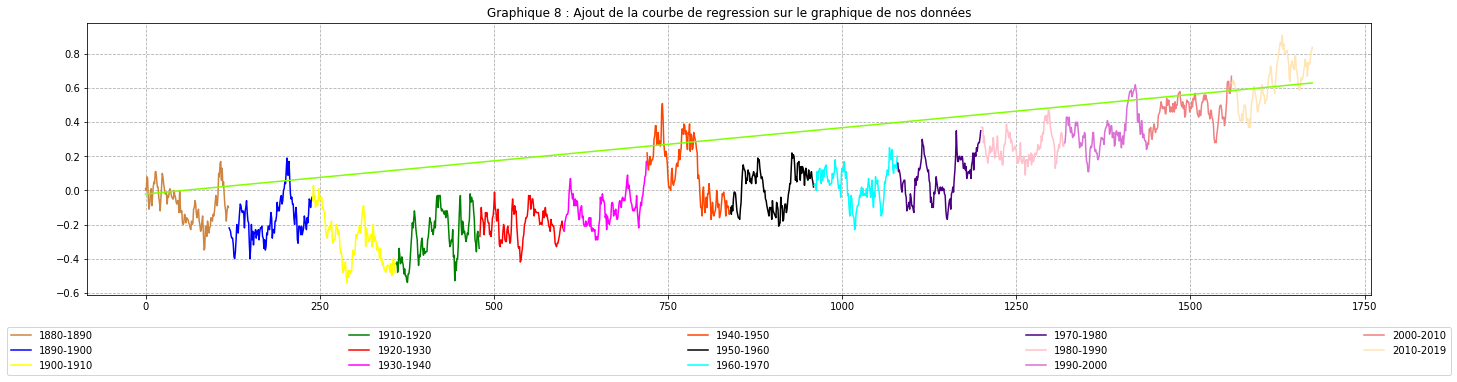

In [11]:
linemoy2 = [statistics.mean(degres[i:len(degres)]) for i in range(0,len(degres))]

courbemoy2 = np.array([i for i in range(len(linemoy2))])

slope2, intercept2, corr2, p_value2, std_err2 = stats.linregress(courbemoy2,linemoy2)

line2 = intercept2 + slope2*courbemoy2

plt.figure(figsize=(23,5))
plt.grid(linestyle='--')
plt.plot(df18801890['Value'],color="peru", label="1880-1890")
plt.plot(df18901900['Value'],color="blue", label="1890-1900")
plt.plot(df19001910['Value'],color="yellow", label="1900-1910")
plt.plot(df19101920['Value'],color="green", label="1910-1920")
plt.plot(df19201930['Value'],color="red", label="1920-1930")
plt.plot(df19301940['Value'],color="fuchsia", label="1930-1940")
plt.plot(df19401950['Value'],color="orangered", label="1940-1950")
plt.plot(df19501960['Value'],color="black", label="1950-1960")
plt.plot(df19601970['Value'],color="aqua", label="1960-1970")
plt.plot(df19701980['Value'],color="indigo", label="1970-1980")
plt.plot(df19801990['Value'],color="pink", label="1980-1990")
plt.plot(df19902000['Value'],color="orchid", label="1990-2000")
plt.plot(df20002010['Value'],color="lightcoral", label="2000-2010")
plt.plot(df20102019['Value'],color="moccasin", label="2010-2019")
plt.legend(loc=8, mode="expand", ncol=5, borderaxespad=-8)
plt.plot(line2,color="chartreuse")
plt.title('Graphique 8 : Ajout de la courbe de regression sur le graphique de nos données')
plt.show()

Avec ce graphique 8, nous confirmons notre intuition donnée en $1.2.1$ : notre série temporelle a une tendance à la hausse. 

**<h2> <span style="color: #008000">2.2 Detection ou non d'outliers (données aberrantes)</span> </h2>**

> Que sont des données aberrantes ? 

Les jeux de données sont souvent composés d'irrégularités et des erreurs sous la forme de données manquantes ou de données aberrantes. Ainsi, savoir appréhender et gérer ces données nous permettra de produire un modèle prédictif plus efficace et optimal. 

</br>

Un outlier est donc une valeur qui diffère grandement des autres valeurs de la même variable. Il est très important de les détecter car ce genre d'observation peut augmenter le temps d'apprentissage, le biaisera. 

</br>


> Comment les détecter ? 

L'une des méthodes la plus simple et efficace est l'utilisation des BoxPlot.

 
Nombre de outlier dans notre jeu de données :  0


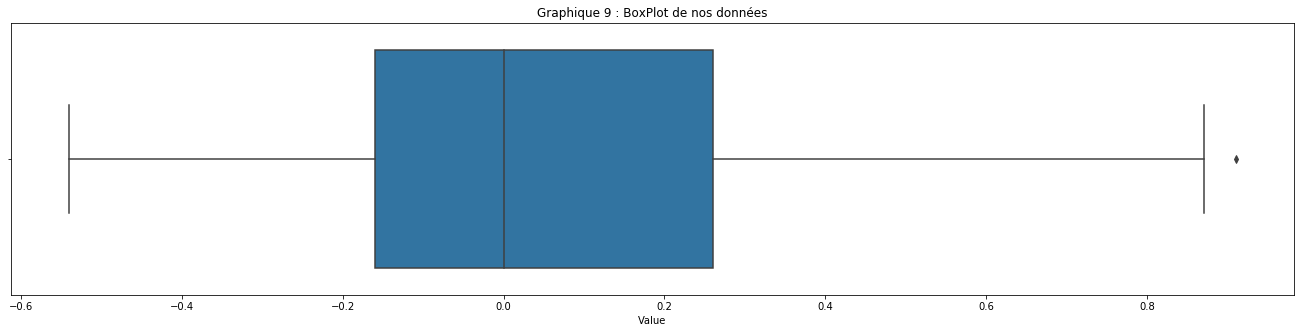

In [12]:
plt.figure(figsize=(23,5))
outl = sns.boxplot(x = 'Value', data = df, orient = "h")
plt.title('Graphique 9 : BoxPlot de nos données')


outliers = 0

for y in degres:
    z = (y-np.mean(degres))/np.std(degres)
    if z > np.max(degres) and z < np.min(degres):
        outliers = outliers + 1
        
print(" ")
print("Nombre de outlier dans notre jeu de données : ", outliers)

> Nous remarquons donc qu'il n'y a aucun outlier. En effet, le point tout à droite n'est pas considéré comme un outlier d'après calcul, que nous avons vérifié plusieurs fois, donc c'est juste une impression visuelle.

**<h2> <span style="color: #008000">2.3 Saisonnalité</span> </h2>**

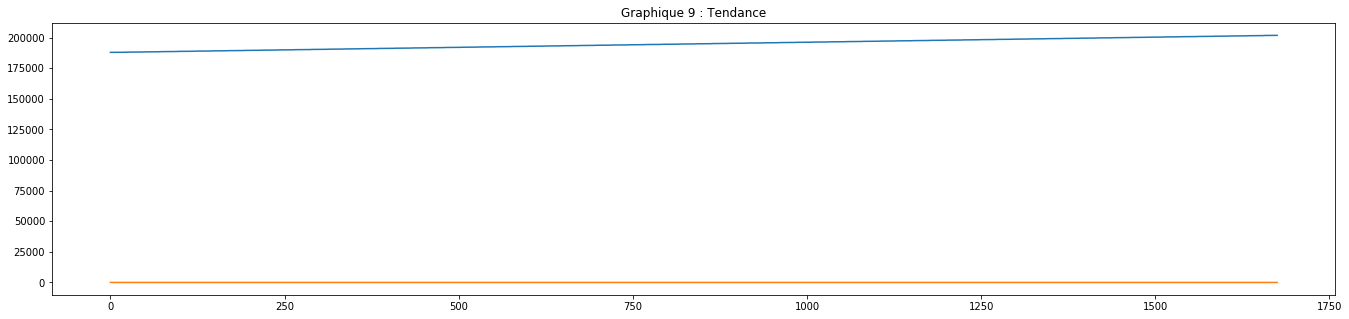

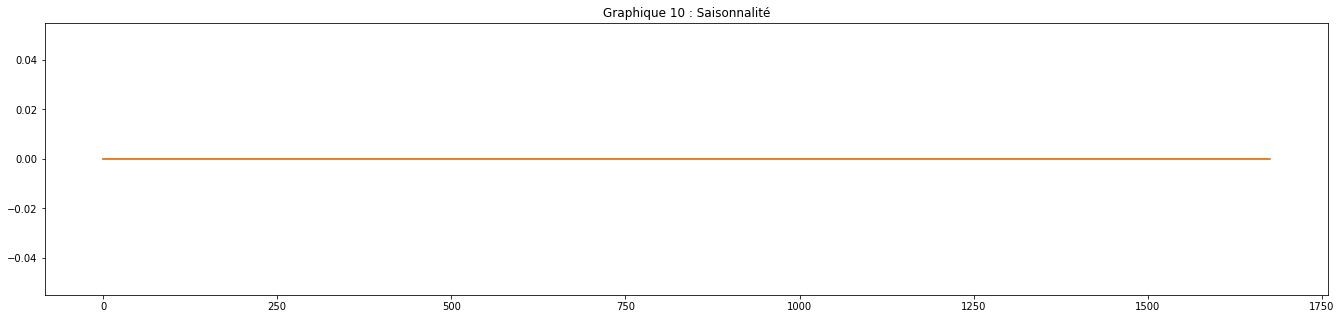

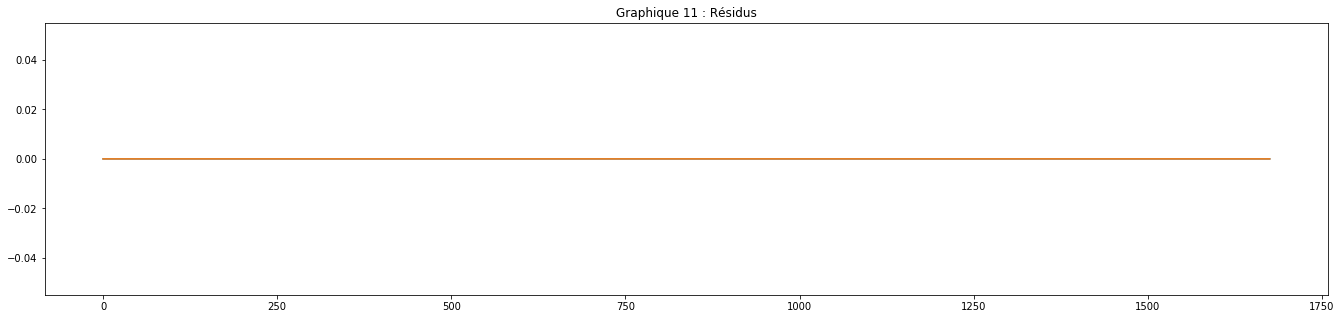

In [13]:
result = seasonal_decompose(df, model="additive",freq=1)
plt.figure(figsize=(23,5))
plt.plot(result.trend)
plt.title('Graphique 9 : Tendance')
plt.figure(figsize=(23,5))
plt.plot(result.seasonal)
plt.title('Graphique 10 : Saisonnalité')
plt.figure(figsize=(23,5))
plt.plot(result.resid)
plt.title('Graphique 11 : Résidus')
plt.show()

Nous remarquons qu'il y a une absence de saisonnalité, et nous formalisons bien notre tendance (légère) par cette fonction.

**<h2> <span style="color: #008000">2.4 Stationnaire ? (Test Dickey-Fuller Augmenté et de Kwiatkowski-Phillips-Schmidt-Shin)</span> </h2>**

> Le test __Dickey-Fuller Augmenté__ est un type de test statistique appelé test de racine unitaire. Un test de racine unitaire permet de déterminer à quel point une série a une tendance ou non. Ce test-ci est le plus utilisé, il utilise un modèle auto-régressif et optimise un critère d'information sur plusieurs valeurs de décalages différentes.

Qui dit test, dit définir les hypothèses : 
* $H0$ est l'hypothèse nulle qui stipule que la série temporelle peut en effet être représentée par une racine unitaire, c'est à dire qu'elle n'est pas stationnaire (dépendante du temps). 
* Ainsi, l'hypothèse alternative $H1$ dit que la série est stationnaire (pas de racine unitaire, indépendante du temps).


> Comme la plupart des test, nous validerons une hypothèse à partir de la $p-value$. Si cette dernière est *inférieure* à $0.05$ alors on rejette l'hypothèse nulle $H0$ : autrement dit, notre série est stationnaire et les données qui la forment ne possèdent pas de racine unitaire. Inversement, si la $p-value$ est *supérieure* à $0.05$ alors on acceptera l'hypothèse nulle $H0$ et nous pourrons conlure que nos données ont une racine unitaire et que notre série est non stationnaire.

> Le test de __Kwiatkowski-Phillips-Schmidt-Shin__ lui est un test de stationnarité. Il s’agit ici de tester si le résidu de la modélisation ARMA se comporte comme un bruit blanc (auquel cas on se place sous H0 :
on admet que $(X_t)$ est un ARMA stationnaire), ou bien s’il se comporte comme une marche aléatoire (auquel cas on se place sous H1 : on admet que $(X_t)$ est un ARIMA non stationnaire). Pour résumer :
* $H0$ est l'hypothèse nulle, synonyme de stationnarité.
* Ainsi, l'hypothèse alternative $H1$ dit que la série est non-stationnaire.

Nous affirmerons que notre série est stationnaire si les deux tests vont dans ce sens.




In [14]:
result = adfuller(degres)
print('ADF Statistic : %f' % result[0])
print('p-value ADF : %f' % result[1])
print(" ") 
print(" ")
warnings.simplefilter("ignore")
kp = kpss(degres)
print('KPSS Statistic : %f' % kp[0])
print('p-value KPSS : %f' % kp[1])

ADF Statistic : -1.172590
p-value ADF : 0.685274
 
 
KPSS Statistic : 5.090140
p-value KPSS : 0.010000


Le test ADF nous renvoie une $p-value$ égale à $0.685274$, *supérieure* à $0.05$, donc que la série est non stationnaire. Déjà, nous savons que notre série ne sera pas stationnaire, peu importe le résultat du test de KPSS. Regardons quand même la $p-value$ du test KPSS : $0.01$, qui est *inférieure* à $0.05$, donc lui aussi renvoie que la série n'est pas stationnaire.
Cela est logique car notre série temporelle contient une tendance.

**<h3> <span style="color: #1A54A4">2.4.1 Tentative de stationnarité</span> </h3>**

Afin de stabiliser les variations temporelles, plusieurs techniques sont utilisées : le passage au logarithme, à la racine carré... Le problème ici est que nous avons des valeurs négatives, ces deux méthodes sont donc impraticables.

> Utilisons donc la méthode de différentiation afin de rendre stationnaire notre série temporelle :

<Figure size 1656x360 with 0 Axes>

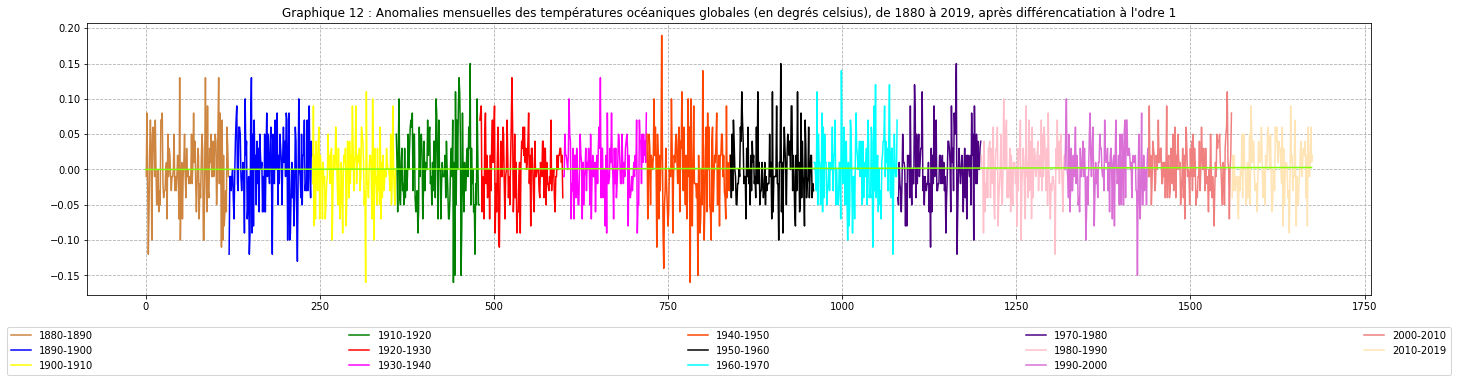

In [15]:
plt.figure(figsize=(23,5))
degres2 = df['Value'].diff(1)
df2 = pd.DataFrame(degres2)

df218801890 = df2[1:120]

df218901900 = df2[120:240]

df219001910 = df2[240:360]

df219101920 = df2[360:480]

df219201930 = df2[480:600]

df219301940 = df2[600:720]

df219401950 = df2[720:840]

df219501960 = df2[840:960]

df219601970 = df2[960:1080]

df219701980 = df2[1080:1200]

df219801990 = df2[1200:1320]

df219902000 = df2[1320:1440]

df220002010 = df2[1440:1560]

df220102019 = df2[1560:]


linemoy3 = [statistics.mean(degres2[1:][i:len(degres2[1:])]) for i in range(0,len(degres2[1:]))]

courbemoy3 = np.array([i for i in range(len(linemoy3))])

slope3, intercept3, corr3, p_value3, std_err3 = stats.linregress(courbemoy3,linemoy3)

line3 = intercept3 + slope3*courbemoy3

plt.figure(figsize=(23,5))
plt.grid(linestyle='--')
plt.plot(df218801890['Value'],color="peru", label="1880-1890")
plt.plot(df218901900['Value'],color="blue", label="1890-1900")
plt.plot(df219001910['Value'],color="yellow", label="1900-1910")
plt.plot(df219101920['Value'],color="green", label="1910-1920")
plt.plot(df219201930['Value'],color="red", label="1920-1930")
plt.plot(df219301940['Value'],color="fuchsia", label="1930-1940")
plt.plot(df219401950['Value'],color="orangered", label="1940-1950")
plt.plot(df219501960['Value'],color="black", label="1950-1960")
plt.plot(df219601970['Value'],color="aqua", label="1960-1970")
plt.plot(df219701980['Value'],color="indigo", label="1970-1980")
plt.plot(df219801990['Value'],color="pink", label="1980-1990")
plt.plot(df219902000['Value'],color="orchid", label="1990-2000")
plt.plot(df220002010['Value'],color="lightcoral", label="2000-2010")
plt.plot(df220102019['Value'],color="moccasin", label="2010-2019")
plt.plot(line3,color="chartreuse")
plt.legend(loc=8, mode="expand", ncol=5, borderaxespad=-8)
plt.title("Graphique 12 : Anomalies mensuelles des températures océaniques globales (en degrés celsius), de 1880 à 2019, après différencatiation à l'odre 1")
plt.show()


En différenciant, nous avons supprimé la tendance, nécessaire pour poursuivre la démarche. Cela est-il suffisant ?

> Pour voir si cela a fonctionné, il est nécessaire de réaliser à nouveau les deux test énumérés plus haut :

In [16]:
result1 = adfuller(degres2[1:])
print('ADF Statistic : %f' % result1[0])
print('p-value ADF : %f' % result1[1])
print(" ") 
print(" ")
warnings.simplefilter("ignore")
kp1 = kpss(degres2[1:])
print('KPSS Statistic : %f' % kp1[0])
print('p-value KPSS : %f' % kp1[1])

ADF Statistic : -12.068045
p-value ADF : 0.000000
 
 
KPSS Statistic : 0.089395
p-value KPSS : 0.100000


Ici, la $p-value$ du test ADF est devenue *inférieure* à $0.05$ donc la série est bien devenue stationnaire. Qu'est-il du test KPSS ? Le suspense est à son comble.
Verdict : la $p-value$ KPSS est passé à $0.1$, donc *supérieure* à $0.05$ donc la série est stationnaire également.

> Ainsi, en différenciant une fois, nous avons obtenu une série temporelle stationnaire.


**<h1> <span style="color: #fb4141">3. Modélisation et prédiction de notre série temporelle</span> </h1>**

> Nous allons tenter de prédire la dernière décennie, c'est à dire la $2010-2019$. Pour faire cela, nous allons créer un nouveau jeu de données qui ne tiendra pas compte de cette décennie, qu'on appelera $train$ pour apprendre , ainsi qu'un second ne contenant que la décennie $2010-2019$, qu'on appellera logiquement $test$ pour comparer. Puis nous comparerons en superposant notre prédiction ainsi que les vraies valeures.

**<h2> <span style="color: #008000">3.1 Création d'un jeu de données apprentissage et test</span> </h2>**

In [17]:
train = degres[:1560]  # qui correspond donc aux décennies 1880-2010
test = degres[1560:]   # qui correspond donc aux décennies 2010-2019
#train = pd.DataFrame(tr)
#test = pd.DataFrame(te)
#print(train)
#print(test)

**<h2> <span style="color: #008000">3.2 Prediction</span> </h2>**

**<h3> <span style="color: #1A54A4">3.2.1 Autocorrélation et autocorrélation partielle</span> </h3>**

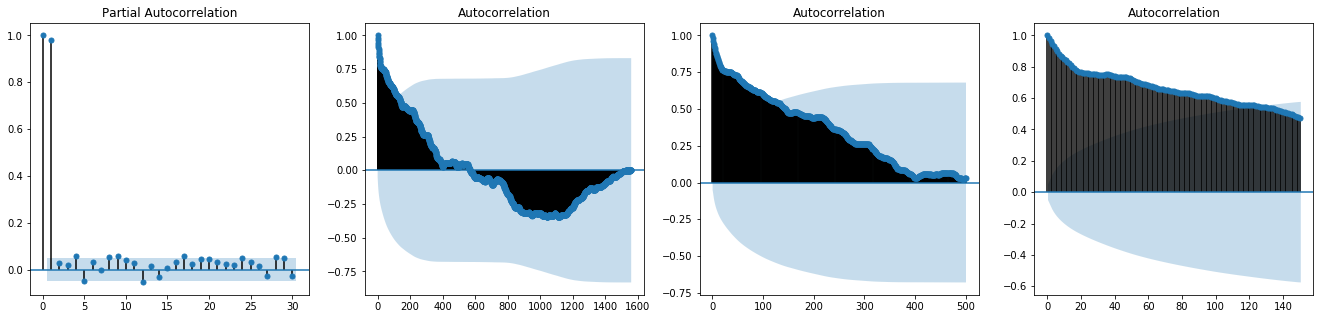

In [18]:
fig, axes = plt.subplots(1,4,figsize=(23,5))
fig = tsaplots.plot_pacf(train, lags= 30, ax=axes[0])
fig = tsaplots.plot_acf(train, lags= 1558, ax=axes[1])
fig = tsaplots.plot_acf(train, lags= 500, ax=axes[2])
fig = tsaplots.plot_acf(train, lags= 150, ax=axes[3])

Grace au Partial Autocorrelation, nous pouvons determiner le paramètre $p : 2$. En effet, nous regardons à partir de quel point il y en a un qui se situe dans la zone bleue. Ainsi, nous sommes en présence d'un $AR(2)$.
Et enfin, graçe au graphique Autocorrelation, il semblerait que nous soyons en présence d'un $MA(q=130)$ : en effet, à partir de ce point ci, tout les autres restent dans la zone bleue. Cependant avoir un $MA(130)$ est loin d'être utilisable pour une quelconque prédiction (normale car pas de résidus d'après le $2.3$).

> Nous allons maintenant essayer tout les modèles et voir le plus performant pour prédire cette décennie $2010-2019$.

**<h3> <span style="color: #1A54A4">3.2.2 Modèle AR (1ière méthode)</span> </h3>**

> Cependant, ici nous voulons **réaliser une prédictions à un seul pas**, c'est à dire que nous devons prendre en compte que la dernière valeur. Donc $p$ = $1$.

In [19]:
stock = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(stock, order=(1,0,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    estpred = output[0]
    predictions.append(estpred)
    vraie = test[t]
    stock.append(vraie)
    #print('predicted=%f, expected=%f' % (estpred, vraie))
error = mean_squared_error(test, predictions)

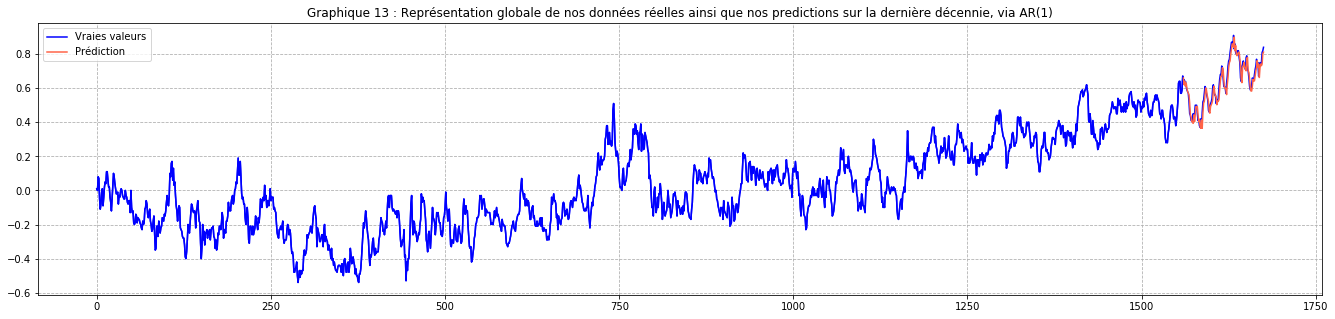

 
Test MSE: 0.002
Le coefficient R2 de ce modèle est =  0.9141145347620172


In [20]:
train2 = [float(t) for t in train]
predictions2 = [p[0] for p in predictions]
predictions2 = train2 + predictions2

plt.figure(figsize=(23,5))
plt.grid(linestyle='--')
dffinal = predictions2[1560:]
#print(dffinal)
plt.plot(df["Value"], color = "blue", label = "Vraies valeurs")
plt.plot(predictions2[:1560], color = "blue")
plt.plot([i for i in range(1560,1676)], dffinal, color = "tomato", label = "Prédiction")
plt.legend()
plt.title('Graphique 13 : Représentation globale de nos données réelles ainsi que nos predictions sur la dernière décennie, via AR(1)')
plt.show()
print(" ")
print('Test MSE: %.3f' % error)
print ("Le coefficient R2 de ce modèle est = ", r2_score(test, predictions))

Bingo ! Il semblerait qu'un modèle $AR(1)$ donne de bonnes prédictions : nous avons un $R^2$ (représente la proportion de la variation de la réponse qui est expliquée par le modèle) de $0.9141$.

> Zoomons simplement sur la décennie prédite :

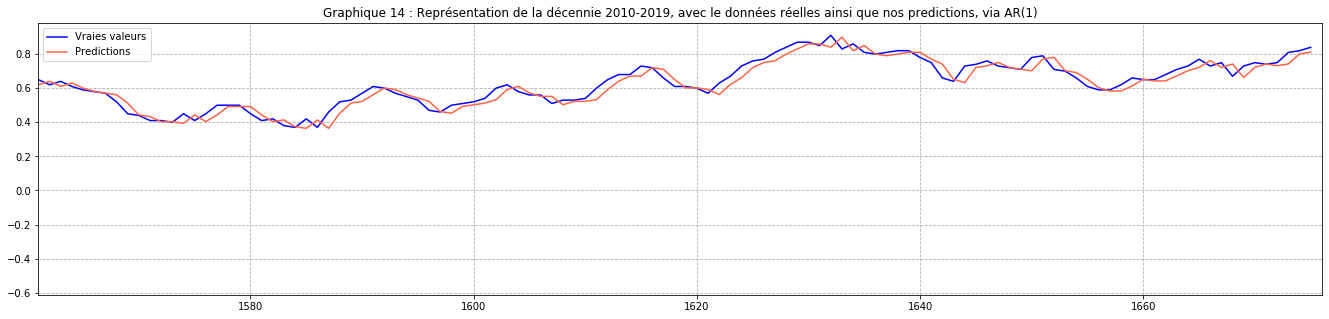

In [21]:
plt.figure(figsize=(23,5))
plt.grid(linestyle='--')
plt.plot(df["Value"], color = "blue", label = "Vraies valeurs")
plt.xlim(1561,1676)
plt.plot(predictions2, color = "tomato", label = "Predictions")
plt.legend()
plt.title('Graphique 14 : Représentation de la décennie 2010-2019, avec le données réelles ainsi que nos predictions, via AR(1)')
plt.show()

> Tentons maintenant une autre implémentation de ce même modèle, par pure curiosité :

**<h3> <span style="color: #1A54A4">3.2.3 Modèle AR (2ième méthode)</span> </h3>**

Nous tentons maintenant une autre facon de faire. Dans la méthode ci dessus, nous apprenons à chaque itération, le modèle étant implémenté dans la boucle. Ici, nous ne réapprenons pas à chaque itération.

In [22]:
# train autoregression
model = ARIMA(train, order=(1,0,0))   
model_fit = model.fit(disp=False)
print(" ")
print('La valeur de décalage choisie est : %s' % model_fit.k_ar)
print(" ")
print("Le coefficient du modèle AR est :\n %s " % model_fit.params)

 
La valeur de décalage choisie est : 1
 
Le coefficient du modèle AR est :
 [0.03699099 0.98380135] 


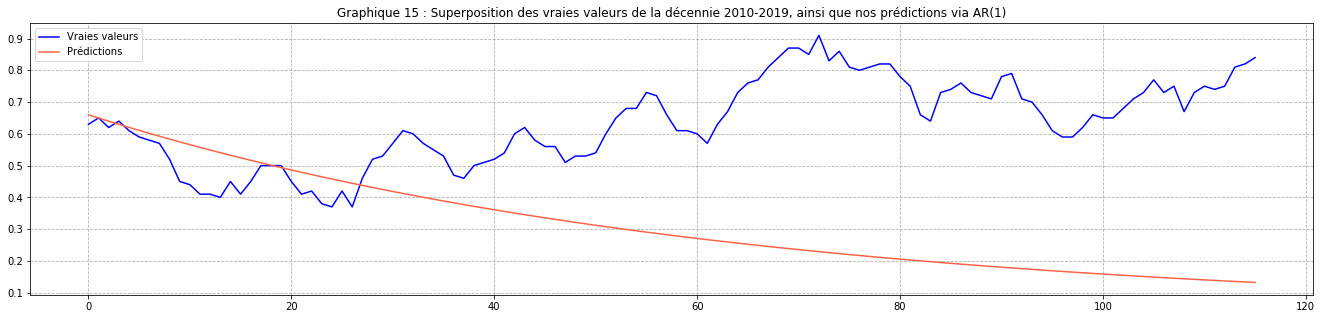

 
Test MSE: 0.167
Le coefficient R2 de ce modèle est =  -8.391527227795189


In [23]:
# make predictions 
predictions = model_fit.predict(
    start = len(train), 
    end = len(train) + len(test) - 1, 
    dynamic = False)
  
plt.figure(figsize=(23,5))
plt.plot(test, color="blue", label="Vraies valeurs")
plt.plot(predictions, color='tomato', label="Prédictions")
plt.grid(linestyle='--'); 
plt.legend()
plt.title('Graphique 15 : Superposition des vraies valeurs de la décennie 2010-2019, ainsi que nos prédictions via AR(1)')
plt.show()

print(" ")
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
print ("Le coefficient R2 de ce modèle est = ", r2_score(test, predictions))

Nous voyons assez facilement visuellement que cette implémentation n'est pas adéquat. Le $R^2$ est égal à $-8.392$, ce qui nous indique que le modèle fait moins bien que si la prédiction était constante et égale à la moyenne des anomalies des températures océanique sur la base de données test.

> Tentons un autre modèle.

**<h3> <span style="color: #1A54A4">3.2.4 Modèle ARIMA</span> </h3>**


Tentons maintenant un modèle appelé $ARIMA$ dont l'acronyme signifie$ AutoRegressive Integrated Moving Average$. Il s'agit d'une généralisation de la moyenne mobile auto-régressive plus simple et ajoute la notion d'intégration, c'est l'une des méthodes les plus couramment utilisées dans la prévision des séries chronologiques.
Il existe trois entiers distincts $(p, d, q)$ utilisés pour paramétrer notre modèle. Ils correspondent à la saisonnalité, la tendance et le bruit dans les jeux de données :
* $p$ est la partie auto-régressive du modèle. Cela nous permet d'intégrer l'effet des valeurs passées dans notre modèle. Cela revient à dire que "si les anomalies ont augmenté les $p$ derniers mois, alors l'anomalie du mois suivant augmentera certainement également".

* $d$ est la partie intégrée du modèle. Ceci inclut les termes du modèle qui incluent la quantité de différenciation. Cela revient à dire que "si la différence des anomalies au cours des $p$ derniers mois était très faible, alors l'anomalie du mois sera probablement égale aux $p$ derniers mois". Ici ce paramètre sera égal à $1$ car nous avons eu besoin de différencier qu'une seule pour retrouver une série temporelle stationnaire. 

* $q$ est la partie moyenne mobile du modèle. Cela nous permet de définir l'erreur de notre modèle comme une combinaison linéaire des valeurs d'erreur observées à des instants précédents dans le passé.

In [24]:
# Debut du decompte du temps
start_time = time.time()

y = train
res = arma_order_select_ic(y, max_ar=2, max_ma=10, ic=['aic', 'bic', 'hqic'], 
                           trend='nc', fit_kw=dict(method='css'))
# on met 5 pour max AR car on a vu AR(2) avec le graphique
# on met que 10 pour max MA car les temps de calcul sont bien moindre (plus de 2h pour faire 
# à 130.. et encore, après 2h on a arreté car c'était interminable)
print('AIC-order: {}' .format(res.aic_min_order))
print('BIC-order: {}' .format(res.bic_min_order))
print('HQIC-order: {}' .format(res.hqic_min_order))
    
#p et q choisis
p = res.bic_min_order[0]
q = res.bic_min_order[1]
print("Le paramètre p est estimé à : ", p)
print("Le paramètre q est estimé à : ", q)

# Affichage du temps d execution
print("Temps d'execution : %s secondes." % (time.time() - start_time))

AIC-order: (2, 7)
BIC-order: (1, 0)
HQIC-order: (2, 7)
Le paramètre p est estimé à :  1
Le paramètre q est estimé à :  0
Temps d'execution : 2.430187940597534 secondes.


> Nous noterons que comme notre volonté est de travailler sur les pas $1$, $6$ et $12$, nous ne tenons pas compte de l'estimation $p$ estimé, il se trouve qu'ici $p$ est égal à $1$, mais pour les deuxième et troisième partie il sera donc de $6$ et $12$. Nous vous laissons le code malgré tout pour attester notre méthode.

Ici $p$ est estimé à $1$ donc parfait pour notre prédiction à un pas. 

In [25]:
stock = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(stock, order=(p,1,q))
	model_fit = model.fit()
	output = model_fit.forecast()
	estpred = output[0]
	predictions.append(estpred)
	vraie = test[t]
	stock.append(vraie)
	#print('predicted=%f, expected=%f' % (estpred, vraie))
error = mean_squared_error(test, predictions)
# Affichage du temps d execution
print("Temps d'execution : %s secondes ---" % (time.time() - start_time))

Temps d'execution : 6.074863910675049 secondes ---


In [26]:
train2 = [float(t) for t in train]
predictions2 = [p[0] for p in predictions]
predictions2 = train2 + predictions2

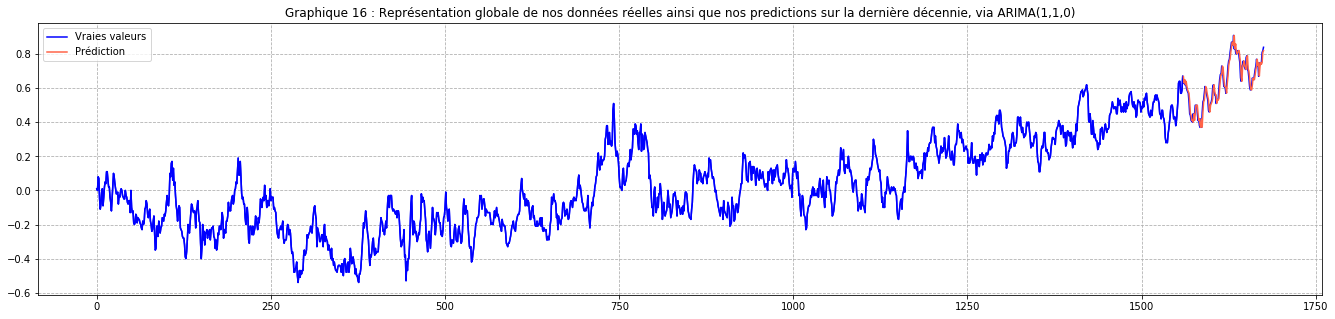

 
Test MSE: 0.001
Le coefficient R2 de ce modèle est =  0.9180117496601009


In [27]:
plt.figure(figsize=(23,5))
plt.grid(linestyle='--')
dffinal = predictions2[1560:]
#print(dffinal)
plt.plot(df["Value"], color = "blue", label = "Vraies valeurs")
plt.plot(predictions2[:1560], color = "blue")
plt.plot([i for i in range(1560,1676)], dffinal, color = "tomato", label = "Prédiction")
plt.legend()
plt.title('Graphique 16 : Représentation globale de nos données réelles ainsi que nos predictions sur la dernière décennie, via ARIMA(1,1,0)')
plt.show()
print(" ")
print('Test MSE: %.3f' % error)
print ("Le coefficient R2 de ce modèle est = ", r2_score(test, predictions))

Jackpot ! Nous obtenons un modèle ayant un $R^2$ de $0.918$ avec notre $ARIMA(1,1,0)$, ainsi qu'une MSE de $0.001$ !

> Enfin, pour finir, affichons nos données juste sur la décennie prédite :

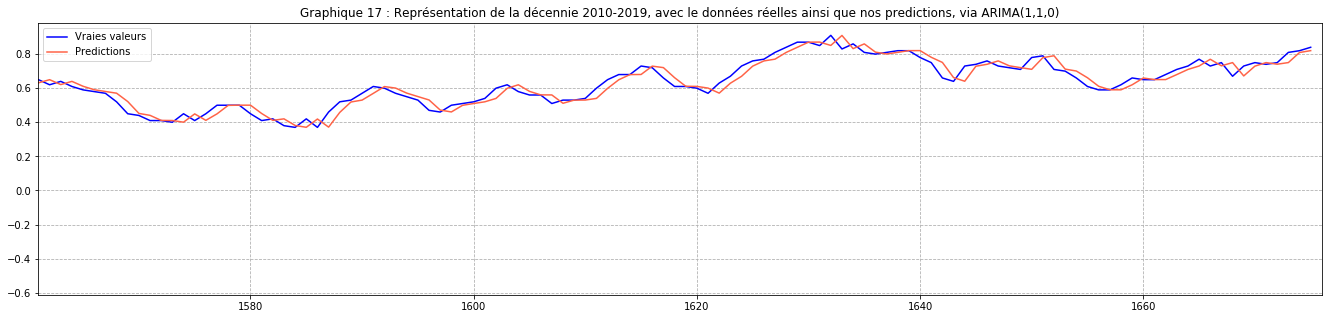

In [28]:
plt.figure(figsize=(23,5))
plt.grid(linestyle='--')
plt.plot(df["Value"], color = "blue", label = "Vraies valeurs")
plt.xlim(1561,1676)
plt.plot(predictions2, color = "tomato", label = "Predictions")
plt.legend()
plt.title('Graphique 17 : Représentation de la décennie 2010-2019, avec le données réelles ainsi que nos predictions, via ARIMA(1,1,0)')
plt.show()

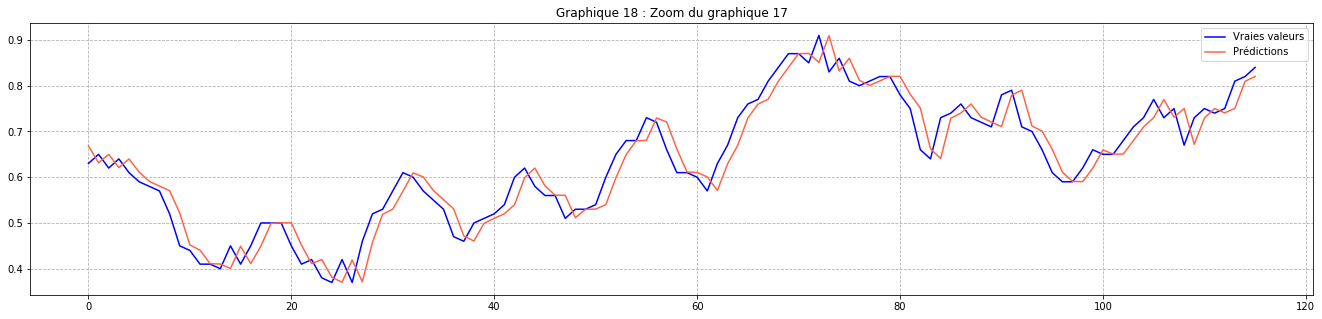

In [29]:
plt.figure(figsize=(23,5))
plt.plot(test, color="blue", label="Vraies valeurs")
plt.plot(predictions, color='tomato', label="Prédictions")
plt.grid(linestyle='--'); 
plt.legend()
plt.title("Graphique 18 : Zoom du graphique 17")
plt.show()

Nous remarquons que nous avons donc une bonne prédiction, à peine mieux que notre $AR(1)$. Cependant, il semblerait qu'il y ait un léger décalage. Celui ci peut s'expliquer par le fait que notre modèle prédit à 1 pas dans le futur, c'est à dire que par exemple pour prédire le mois de décembre 2013 il s'appuie sur le mois de novembre 2013, ainisi ceci est décalé d'un mois.

**<h1> <span style="color: #fb4141">4. Prédiction des anomalies des températures océanique à l'horizon 2050</span> </h1>**

> Pour finir cette première grande partie de notre projet, nous avons tenté la "fameuse" prédiction à l'horizon 2050 que nous entendons partout lorsqu'il s'agit de réchauffement climatique, que se soit à la télévision ou la radio. Nous avons bien entendu utilisé les données que nous avions à notre disposition.

**<h2> <span style="color: #008000">4.1 Utilisation du meilleur modèle : $ARIMA(1,1,0)$</span> </h2>**

In [30]:
stock1 = [x for x in degres]  
model1 = ARIMA(stock1, order=(p,1,q))
model_fit1 = model1.fit()

**<h2> <span style="color: #008000">4.2 Implémentation de la notion "jusqu'en 2050"</span> </h2>**

> Ici nous voulons prévoir jusqu'en 2050 : nous rappelons que notre jeu de données s'arretait en Aout 2019 et que les relevés étaient mensuels.
Pour connaitre le nombre de mois entre Aout 2019 et Décembre 2049, nous avons fais un calcul tout simple : 30*12 (30 ans d'écart) + 4 (le nombre de mois qui reste pour finir 2019).
Ainsi, nous allons prévoir 364 mois dans le futur, dit "out of sample".

In [31]:
forecast1 = model_fit1.forecast(steps=364)[0]

Après plusieurs recherches et moultes tentatives (certaines concluantes en terme de rendu mais peu probable comme des prédictions en droite linéaire à la hausse, des courbes descendantes, etc etc.), nous avons abouti à ce code.

La fonction inverse_difference "annule" la différenciation, mais par soucis d'implémentation dans la boucle nous avons décidé de l'utiliser, plutot que de prendre directement notre jeu de données "degrés" qui est pas différencier. En effet, cette fonction permet d'itérer en yhat, alors qu'avec "degrés" nous ne voyons pas le moyen de réaliser cela.

In [32]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]


futur = 364
mois = 1
for yhat in forecast1:
    #estpred
    estpred2 = inverse_difference(stock1, yhat, futur)
    #print('Mois : %f' % (estpred2))
    stock1.append(estpred2)
    mois += 1

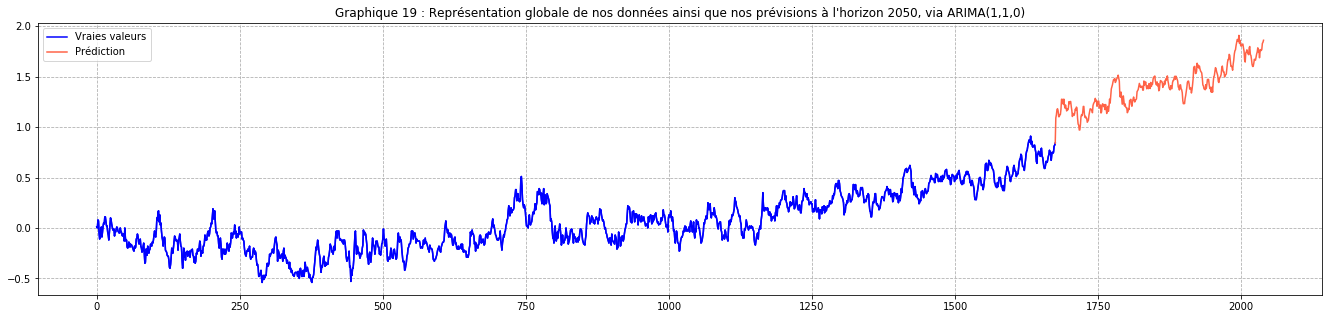

In [33]:
plt.figure(figsize=(23,5))
plt.grid(linestyle='--')
dffinal = stock1[1675:]
#print(dffinal)
plt.plot(df["Value"], color = "blue", label = "Vraies valeurs")
plt.plot(stock1[:1676], color = "blue")
plt.plot([i for i in range(len(degres)-1,len(stock1))], dffinal, color = "tomato", label = "Prédiction")
plt.legend()
plt.title("Graphique 19 : Représentation globale de nos données ainsi que nos prévisions à l'horizon 2050, via ARIMA(1,1,0)")
plt.show()

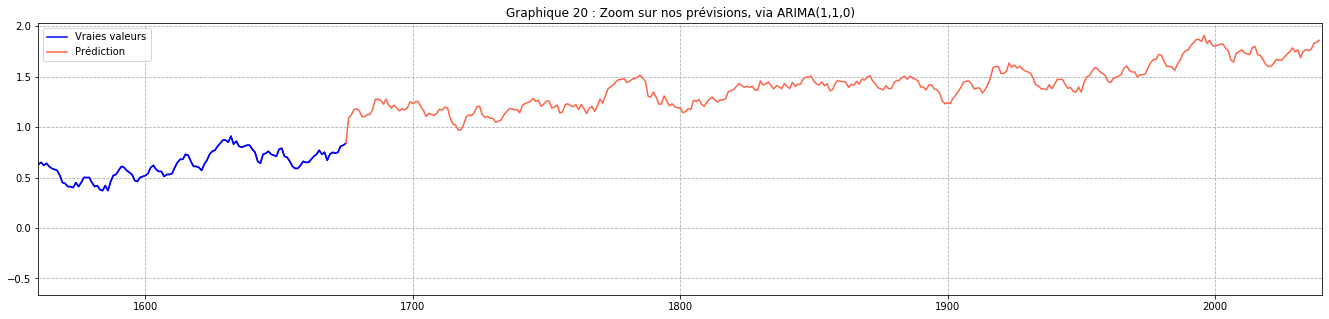

In [34]:
plt.figure(figsize=(23,5))
plt.grid(linestyle='--')
dffinal = stock1[1675:]
#print(dffinal)
plt.plot(df["Value"], color = "blue", label = "Vraies valeurs")
plt.xlim(len(train), len(stock1))
plt.plot(stock1[:1676], color = "blue")
plt.plot([i for i in range(len(degres)-1,len(stock1))], dffinal, color = "tomato", label = "Prédiction")
plt.legend()
plt.title('Graphique 20 : Zoom sur nos prévisions, via ARIMA(1,1,0)')
plt.show()

> Et voici notre prédiction à l'horizon 2050 ! Celle-ci nous semble plutôt cohérente si les choses continuent comme cela.. C'est à dire que nous remarquerons des anomalies de températures de plus en plus importante, jusqu'à atteindre les $+1.86$ degrés en Décembre 2049.

**----------------------------------------------------------------------------------------------------------------------------------------------------------**

**----------------------------------------------------------------------------------------------------------------------------------------------------------**

**----------------------------------------------------------------------------------------------------------------------------------------------------------**

**----------------------------------------------------------------------------------------------------------------------------------------------------------**

**<h1><center> <span style="color: #B014BA">DEUXIEME PARTIE : PREDICTION A 6 PAS</span> </center></h1>**

> Dans cette partie, nous allons tenter de prédire en utilisant les **6 derniers mois**. C'est à dire que pour prédire Juin par exemple, nous utilisons Décembre, Janvier, Février, Mars, Avril et Mai.

In [35]:
trainsemestre = degres[:1560]  # qui correspond donc aux décennies 1880-2010
testsemestre = degres[1560:]   # qui correspond donc aux décennies 2010-2019

**<h2> <span style="color: #008000">5.6 Modélisation et prédiction de notre nouvelle série temporelle</span> </h2>**

**<h3> <span style="color: #1A54A4">5.6.1 Prédiction</span> </h3>**

**<h4> <span style="color: #0080FF">5.6.1.1 Modèle AR (1ière méthode)</span> </h4>**

In [36]:
stocksemestre = [x for x in trainsemestre]
predictionssemestre = list()
for t in range(len(testsemestre)):
    modelsemestre = ARIMA(stocksemestre, order=(6,0,0))    # p = 6 car cela permet de regarder jusqu'à la 
                                                            # valeur t-6, ce que l'on souhaite
    model_fitsemestre = modelsemestre.fit()
    outputsemestre = model_fitsemestre.forecast()
    estpredsemestre = outputsemestre[0]
    predictionssemestre.append(estpredsemestre)
    vraiesemestre = testsemestre[t]
    stocksemestre.append(vraiesemestre)
    #print('predicted=%f, expected=%f' % (estpred, vraie))
errorsemestre = mean_squared_error(testsemestre, predictionssemestre)

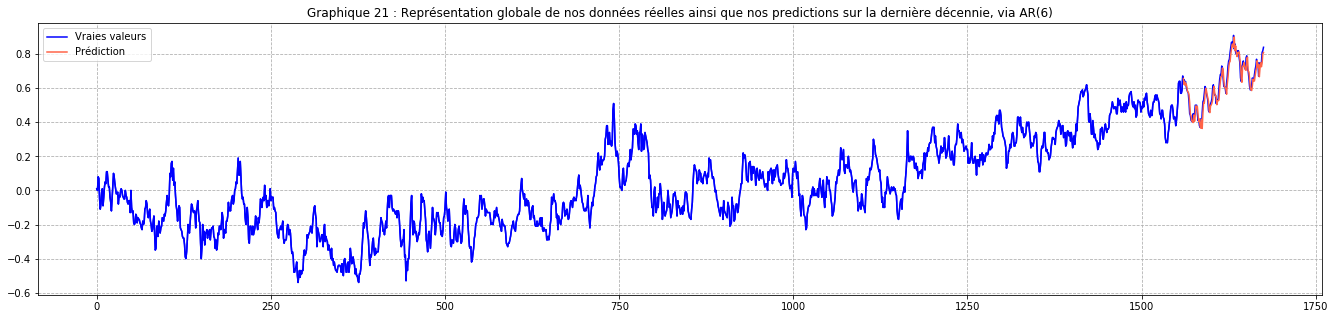

 
Test MSE: 0.002
Le coefficient R2 de ce modèle est =  0.9135758249205721


In [37]:
trainsemestre2 = [float(t) for t in trainsemestre]
predictionssemestre2 = [p[0] for p in predictionssemestre]
predictionssemestre2 = trainsemestre2 + predictionssemestre2

plt.figure(figsize=(23,5))
plt.grid(linestyle='--')
dffinalsemestre = predictionssemestre2[1560:]
#print(dffinal)
plt.plot(df["Value"], color = "blue", label = "Vraies valeurs")
plt.plot(predictionssemestre2[:1560], color = "blue")
plt.plot([i for i in range(1560,1676)], dffinalsemestre, color = "tomato", label = "Prédiction")
plt.legend()
plt.title('Graphique 21 : Représentation globale de nos données réelles ainsi que nos predictions sur la dernière décennie, via AR(6)')
plt.show()
print(" ")
print('Test MSE: %.3f' % errorsemestre)
print ("Le coefficient R2 de ce modèle est = ", r2_score(testsemestre, predictionssemestre))

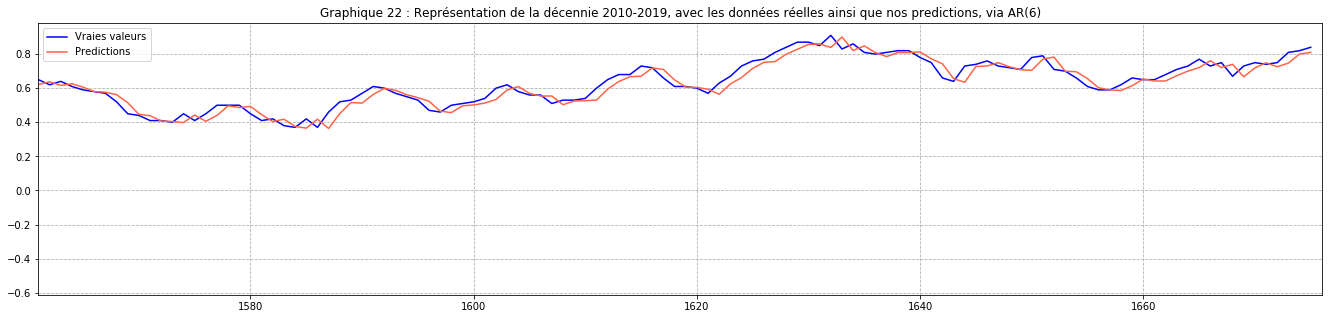

In [38]:
plt.figure(figsize=(23,5))
plt.grid(linestyle='--')
plt.plot(df["Value"], color = "blue", label = "Vraies valeurs")
plt.xlim(1561,1676)
plt.plot(predictionssemestre2, color = "tomato", label = "Predictions")
plt.legend()
plt.title('Graphique 22 : Représentation de la décennie 2010-2019, avec les données réelles ainsi que nos predictions, via AR(6)')
plt.show()

**<h4> <span style="color: #0080FF">5.6.1.2 Modèle AR (2ième méthode)</span> </h4>**

Nous tentons maintenant une autre facon de faire. Dans la méthode ci dessus, nous apprenons à chaque itération, le modèle étant implémenté dans la boucle. Ici, nous ne réapprenons pas à chaque itération.

In [39]:
# traindemiannee autoregression
modelsemestre = ARMA(trainsemestre, order=(6,0,0))         # p = 6 car cela permet de regarder jusqu'à la 
                                                            # valeur t-6, ce que l'on souhaite
modelsemestre_fit = modelsemestre.fit()
print(" ")
print('La valeur de décalage choisie est : %s' % modelsemestre_fit.k_ar)
print(" ")
print("Le coefficient du modèle AR est :\n %s " % modelsemestre_fit.params)

 
La valeur de décalage choisie est : 6
 
Le coefficient du modèle AR est :
 [ 0.04163046  0.97098425 -0.00558475 -0.04279778  0.10046486 -0.07368765
  0.03611433] 


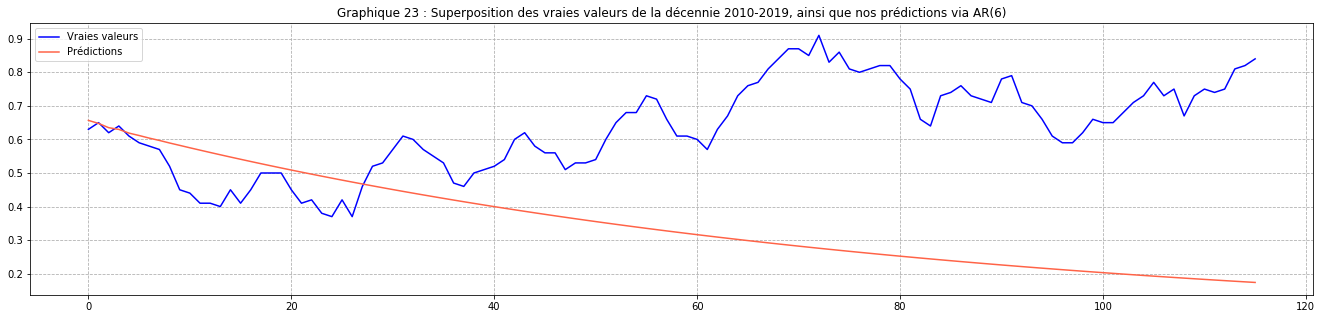

 
Test MSE: 0.139
Le coefficient R2 de ce modèle est =  -6.858168069640838


In [40]:
# make predictions 
predictionssemestre = modelsemestre_fit.predict(
    start = len(trainsemestre), 
    end = len(trainsemestre) + len(testsemestre) - 1, 
    dynamic = False)
  
plt.figure(figsize=(23,5))
plt.plot(testsemestre, color="blue", label="Vraies valeurs")
plt.plot(predictionssemestre, color='tomato', label="Prédictions")
plt.grid(linestyle='--'); 
plt.legend()
plt.title('Graphique 23 : Superposition des vraies valeurs de la décennie 2010-2019, ainsi que nos prédictions via AR(6)')
plt.show()

print(" ")
errorsemestre = mean_squared_error(testsemestre, predictionssemestre)
print('Test MSE: %.3f' % errorsemestre)
print ("Le coefficient R2 de ce modèle est = ", r2_score(testsemestre, predictionssemestre))

**<h4> <span style="color: #0080FF">5.6.1.5 Modèle ARIMA</span> </h4>**

In [41]:
stocksemestre = [x for x in trainsemestre]
predictionssemestre = list()
for t in range(len(testsemestre)):
    modelsemestre = ARIMA(stocksemestre, order=(6,1,0))   # p = 6 car cela permet de regarder jusqu'à la 
                                                            # valeur t-6, ce que l'on souhaite et 
                                                            # d = 1 car nécessité de différencier 1 fois
    model_fitsemestre = modelsemestre.fit()
    outputsemestre = model_fitsemestre.forecast()
    estpredsemestre = outputsemestre[0]
    predictionssemestre.append(estpredsemestre)
    vraiesemestre = testsemestre[t]
    stocksemestre.append(vraiesemestre)
    #print('predicted=%f, expected=%f' % (estpred, vraie))
errorsemestre = mean_squared_error(testsemestre, predictionssemestre)
# Affichage du temps d execution
#print("Temps d'execution : %s secondes ---" % (time.time() - start_time))

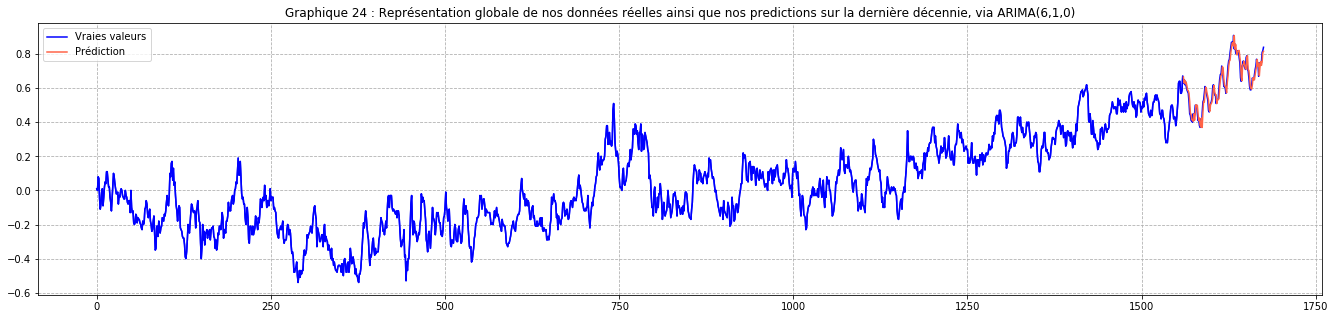

 
Test MSE: 0.001
Le coefficient R2 de ce modèle est =  0.9172770184726063


In [42]:
trainsemestre2 = [float(t) for t in trainsemestre]
predictionssemestre2 = [p for p in predictionssemestre]
predictionssemestre2 = trainsemestre2 + predictionssemestre2

plt.figure(figsize=(23,5))
plt.grid(linestyle='--')
dffinalsemestre = predictionssemestre2[1560:]
#print(dffinal)
plt.plot(df["Value"], color = "blue", label = "Vraies valeurs")
plt.plot(predictionssemestre2[:1560], color = "blue")
plt.plot([i for i in range(1560,1676)], dffinalsemestre, color = "tomato", label = "Prédiction")
plt.legend()
plt.title('Graphique 24 : Représentation globale de nos données réelles ainsi que nos predictions sur la dernière décennie, via ARIMA(6,1,0)')
plt.show()
print(" ")
print('Test MSE: %.3f' % errorsemestre)
print ("Le coefficient R2 de ce modèle est = ", r2_score(testsemestre, predictionssemestre))

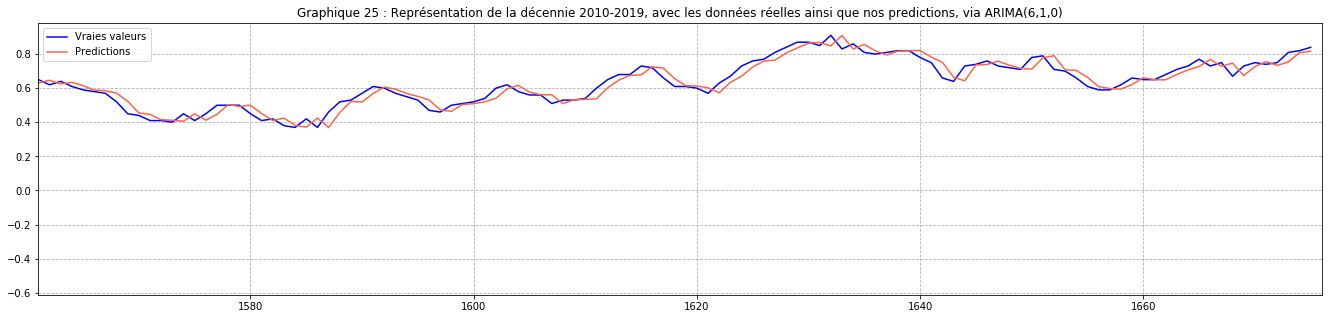

In [43]:
plt.figure(figsize=(23,5))
plt.grid(linestyle='--')
plt.plot(df["Value"], color = "blue", label = "Vraies valeurs")
plt.xlim(1561,1676)
plt.plot(predictionssemestre2, color = "tomato", label = "Predictions")
plt.legend()
plt.title('Graphique 25 : Représentation de la décennie 2010-2019, avec les données réelles ainsi que nos predictions, via ARIMA(6,1,0)')
plt.show()

**<h2> <span style="color: #008000">5.7 Tentative de prédiction des anomalies des températures océanique à l'horizon 2050</span> </h2>**

In [44]:
stock2 = [x for x in degres]  
model2 = ARIMA(stock2, order=(6,1,0))
model_fit2 = model2.fit()
forecast2 = model_fit2.forecast(steps=364)[0]

In [45]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]


futur2 = 364
demi_annee = 1
for yhat in forecast2:
    #estpred
    estpred3 = inverse_difference(stock2, yhat, futur2)
    #print('Mois : %f' % (estpred3))
    stock2.append(estpred3)
    demi_annee += 1

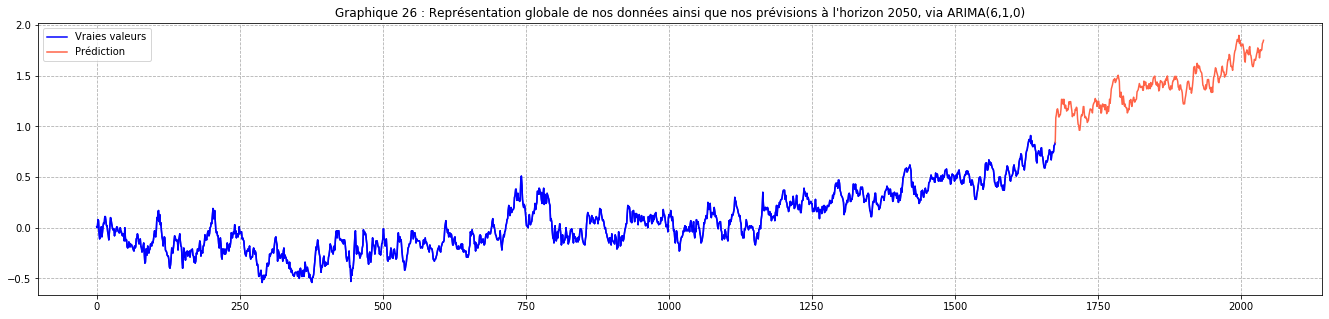

In [46]:
plt.figure(figsize=(23,5))
plt.grid(linestyle='--')
dffinalsemestre = stock2[1675:]
#print(dffinal)
plt.plot(df["Value"], color = "blue", label = "Vraies valeurs")
plt.plot(stock2[:1676], color = "blue")
plt.plot([i for i in range(len(degres)-1,len(stock2))], dffinalsemestre, color = "tomato", label = "Prédiction")
plt.legend()
plt.title("Graphique 26 : Représentation globale de nos données ainsi que nos prévisions à l'horizon 2050, via ARIMA(6,1,0)")
plt.show()

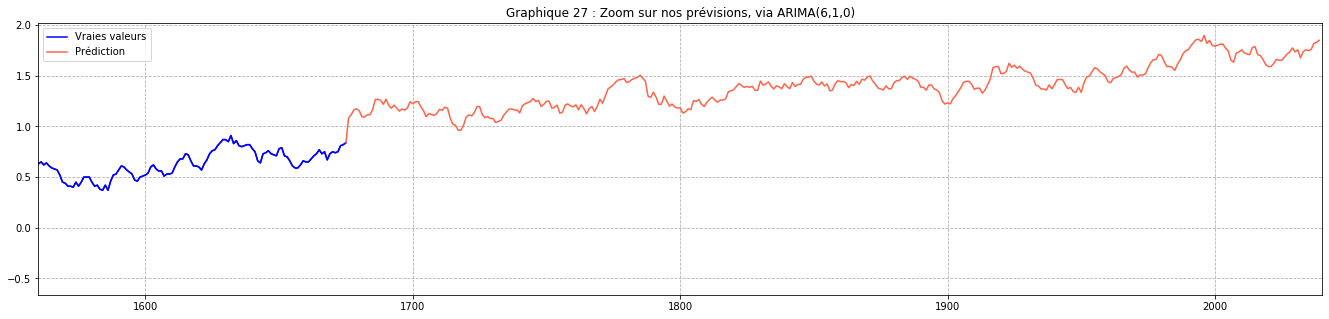

In [47]:
plt.figure(figsize=(23,5))
plt.grid(linestyle='--')
dffinalsemestre = stock2[1675:]
#print(dffinal)
plt.plot(df["Value"], color = "blue", label = "Vraies valeurs")
plt.xlim(len(trainsemestre), len(stock2))
plt.plot(stock2[:1676], color = "blue")
plt.plot([i for i in range(len(degres)-1,len(stock2))], dffinalsemestre, color = "tomato", label = "Prédiction")
plt.legend()
plt.title('Graphique 27 : Zoom sur nos prévisions, via ARIMA(6,1,0)')
plt.show()

**----------------------------------------------------------------------------------------------------------------------------------------------------------**

**----------------------------------------------------------------------------------------------------------------------------------------------------------**

**----------------------------------------------------------------------------------------------------------------------------------------------------------**

**----------------------------------------------------------------------------------------------------------------------------------------------------------**

**----------------------------------------------------------------------------------------------------------------------------------------------------------**

**<h1><center> <span style="color: #B014BA">TROISIEME PARTIE : PREDICTION A 12 PAS</span> </center></h1>**

> Dans cette partie, nous allons tenter de prédire en utilisant les **12 derniers mois**. C'est à dire que pour prédire Juin 2018 par exemple, nous utilisons tout les mois remontant jusqu'en Juin 2017 compris.

In [48]:
trainannee= degres[:1560]  # qui correspond donc aux décennies 1880-2010
testannee = degres[1560:]   # qui correspond donc aux décennies 2010-2019

**<h2> <span style="color: #008000">6.6 Modélisation et prédiction de notre nouvelle série temporelle </h2>**

**<h3> <span style="color: #1A54A4">6.6.1 Prédiction</span> </h3>**

**<h4> <span style="color: #0080FF">6.6.1.1 Modèle AR (1ière méthode)</span> </h4>**

In [49]:
stockannee = [x for x in trainannee]
predictionsannee = list()
for t in range(len(testannee)):
	model = ARIMA(stockannee, order=(12,0,0))       # p = 12 car cela permet de regarder jusqu'à la 
                                                            # valeur t-12, ce que l'on souhaite
	model_fit = model.fit()
	output = model_fit.forecast()
	estpredannee = output[0] 
	predictionsannee.append(estpredannee)
	vraieannee = testannee[t]
	stockannee.append(vraieannee)
	#print('predicted=%f, expected=%f' % (estpredannee, vraieannee))
errorannee = mean_squared_error(testannee, predictionsannee)

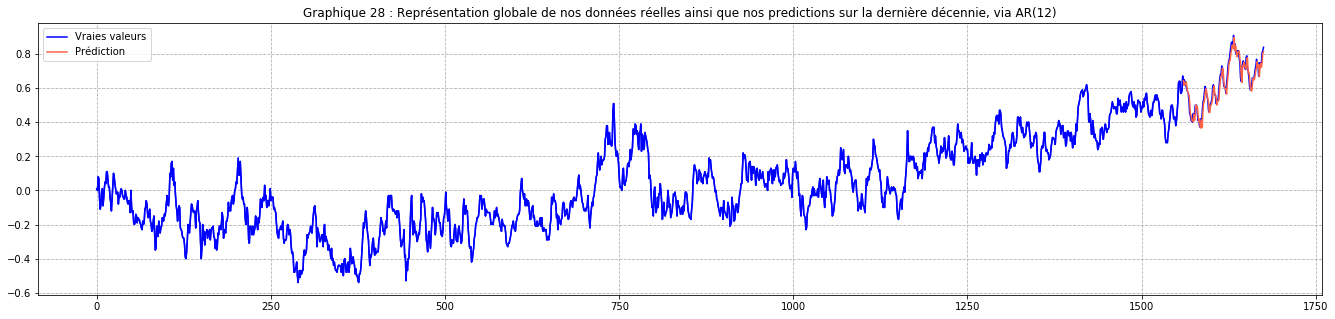

 
Taest MSE: 0.001
Le coefficient R2 de ce modèle est =  0.9173441846837633


In [50]:
trainannee2 = [float(t) for t in trainannee]
predictionsannee2 = [p[0] for p in predictionsannee]
predictionsannee2 = trainannee2 + predictionsannee2

plt.figure(figsize=(23,5))
plt.grid(linestyle='--')
dffinalannee = predictionsannee2[1560:]
#print(dffinal)
plt.plot(df["Value"], color = "blue", label = "Vraies valeurs")
plt.plot(predictionsannee2[:1560], color = "blue")
plt.plot([i for i in range(1560,1676)], dffinalannee, color = "tomato", label = "Prédiction")
plt.legend()
plt.title('Graphique 28 : Représentation globale de nos données réelles ainsi que nos predictions sur la dernière décennie, via AR(12)')
plt.show()
print(" ")
print('Taest MSE: %.3f' % errorannee)
print ("Le coefficient R2 de ce modèle est = ", r2_score(testannee, predictionsannee))

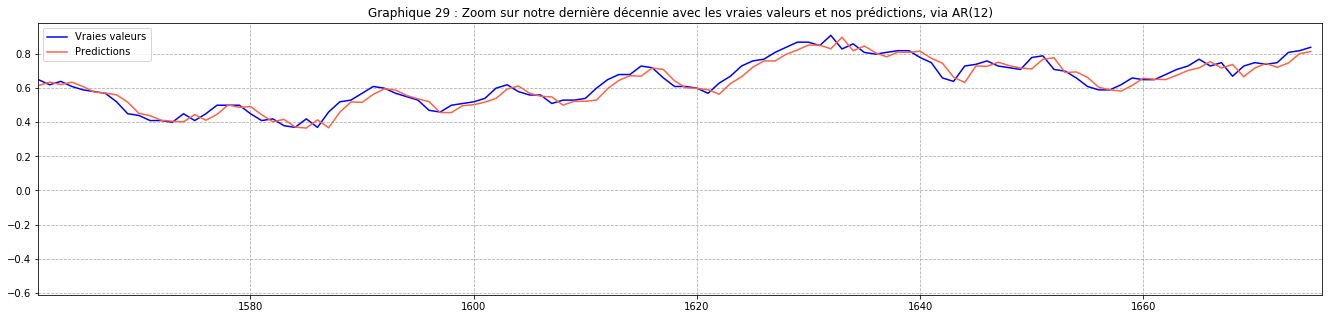

In [51]:
plt.figure(figsize=(23,5))
plt.grid(linestyle='--')
plt.plot(df["Value"], color = "blue", label = "Vraies valeurs")
plt.xlim(1561,1676)
plt.plot(predictionsannee2, color = "tomato", label = "Predictions")
plt.legend()
plt.title('Graphique 29 : Zoom sur notre dernière décennie avec les vraies valeurs et nos prédictions, via AR(12)')
plt.show()

**<h4> <span style="color: #0080FF">6.6.1.3 Modèle AR (2ième méthode)</span> </h4>**

Nous tentons maintenant une autre facon de faire. Dans la méthode ci dessus, nous apprenons à chaque itération, le modèle étant implémenté dans la boucle. Ici, nous ne réapprenons pas à chaque itération.

In [52]:
# trainannee autoregression
# de base j'avais fais model = AR(trainannee)
#model_fit = model.fit()
model = ARMA(trainannee, order=(12,0,0))        # p = 12 car cela permet de regarder jusqu'à la 
                                                            # valeur t-12, ce que l'on souhaite 
model_fit = model.fit()
print(" ")
print('La valeur de décalage choisie est : %s' % model_fit.k_ar)
print(" ")
print("Le coefficient du modèle AR est :\n %s " % model_fit.params)

 
La valeur de décalage choisie est : 12
 
Le coefficient du modèle AR est :
 [ 0.0467612   0.96696101 -0.00407254 -0.03910261  0.09924792 -0.07655419
  0.0386406  -0.04379491 -0.00568834  0.01651927  0.01691926  0.06776389
 -0.04972946] 


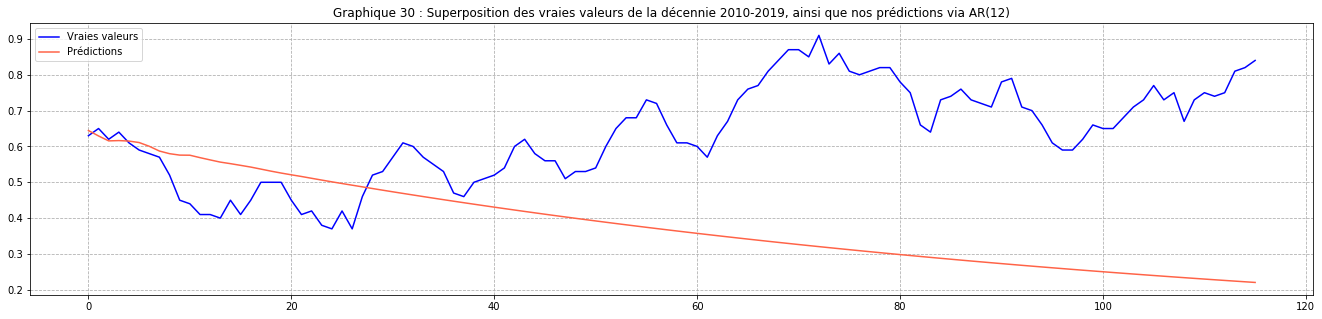

 
Test MSE: 0.115
Le coefficient R2 de ce modèle est =  -5.4845505790000395


In [53]:
# make predictions AR
predictionsannee = model_fit.predict(
    start = len(trainannee), 
    end = len(trainannee) + len(testannee) - 1, 
    dynamic = False)
  
plt.figure(figsize=(23,5))
plt.plot(testannee, color="blue", label="Vraies valeurs")
plt.plot(predictionsannee, color='tomato', label="Prédictions")
plt.grid(linestyle='--'); 
plt.legend()
plt.title('Graphique 30 : Superposition des vraies valeurs de la décennie 2010-2019, ainsi que nos prédictions via AR(12)')
plt.show()

print(" ")
errorannee = mean_squared_error(testannee, predictionsannee)
print('Test MSE: %.3f' % errorannee)
print ("Le coefficient R2 de ce modèle est = ", r2_score(testannee, predictionsannee))

**<h4> <span style="color: #0080FF">6.6.1. Modèle ARIMA</span> </h4>**

In [ ]:
stockannee = [x for x in trainannee]
predictionsannee = list()
for t in range(len(testannee)):
	model = ARIMA(stockannee, order=(12,1,0))         # p = 12 car cela permet de regarder jusqu'à la 
                                                            # valeur t-12, ce que l'on souhaite et 
                                                            # d = 1 car nécessité de différencier 1 fois
	model_fit = model.fit()
	output = model_fit.forecast()
	estpredannee = output[0] 
	predictionsannee.append(estpredannee)
	vraieannee = testannee[t]
	stockannee.append(vraieannee)
	#print('predicted=%f, expected=%f' % (estpredannee, vraieannee))
errorannee = mean_squared_error(testannee, predictionsannee)
# Affichage du temps d execution
#print("Temps d'execution : %s secondes ---" % (time.time() - start_time))

In [ ]:
trainannee2 = [float(t) for t in trainannee]
predictionsannee2 = [p[0] for p in predictionsannee]
predictionsannee2 = trainannee2 + predictionsannee2

plt.figure(figsize=(23,5))
plt.grid(linestyle='--')
dffinalannee = predictionsannee2[1560:]
#print(dffinal)
plt.plot(df["Value"], color = "blue", label = "Vraies valeurs")
plt.plot(predictionsannee2[:1560], color = "blue")
plt.plot([i for i in range(1560,1676)], dffinalannee, color = "tomato", label = "Prédiction")
plt.legend()
plt.title('Graphique 31 : Représentation globale de nos données réelles ainsi que nos predictions sur la dernière décennie, via ARIMA(12,1,0)')
plt.show()
print(" ")
print('Taest MSE: %.3f' % errorannee)
print ("Le coefficient R2 de ce modèle est = ", r2_score(testannee, predictionsannee))

In [ ]:
plt.figure(figsize=(23,5))
plt.grid(linestyle='--')
plt.plot(df["Value"], color = "blue", label = "Vraies valeurs")
plt.xlim(1561,1676)
plt.plot(predictionsannee2, color = "tomato", label = "Predictions")
plt.legend()
plt.title('Graphique 32 : Représentation de la décennie 2010-2019, avec le données réelles ainsi que nos predictions, via ARIMA(12,1,0)')
plt.show()

**<h2> <span style="color: #008000">7.7 Tentative de prédiction des anomalies des températures océanique à l'horizon 2050</span> </h2>**

In [ ]:
stock3 = [x for x in stockannee]  
model3 = ARIMA(stock3, order=(12,1,0))          # p = 12 car cela permet de regarder jusqu'à la 
                                                            # valeur t-12, ce que l'on souhaite et 
                                                            # d = 1 car nécessité de différencier 1 fois
model_fit3 = model3.fit()
forecast3 = model_fit3.forecast(steps=364)[0]

In [ ]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

futur3 = 364
annee = 1
for yhat in forecast3:
    #estpred
    estpred4 = inverse_difference(stock3, yhat, futur3)
    #print('Année : %f' % (estpred4))
    stock3.append(estpred4)
    annee += 1

In [ ]:
plt.figure(figsize=(23,5))
plt.grid(linestyle='--')
dffinalannee = stock3[1675:]
#print(dffinal)
plt.plot(df["Value"], color = "blue", label = "Vraies valeurs")
plt.plot(stock3[:1676], color = "blue")
plt.plot([i for i in range(len(degres)-1,len(stock3))], dffinalannee, color = "tomato", label = "Prédiction")
plt.legend()
plt.title("Graphique 33 : Représentation globale de nos données avec nos prévisions pour l'horizon 2050, via ARIMA(12,1,0)")
plt.show()

In [ ]:
plt.figure(figsize=(23,5))
plt.grid(linestyle='--')
dffinalannee = stock3[1675:]
#print(dffinal)
plt.plot(df["Value"], color = "blue", label = "Vraies valeurs")
plt.xlim(len(trainannee), len(stock3))
plt.plot(stock3[:1676], color = "blue")
plt.plot([i for i in range(len(degres)-1,len(stock3))], dffinalannee, color = "tomato", label = "Prédiction")
plt.legend()
plt.title('Graphique 34 : Zoom sur nos prévisions, via ARIMA(12,1,0)')
plt.show()

**----------------------------------------------------------------------------------------------------------------------------------------------------------**

**----------------------------------------------------------------------------------------------------------------------------------------------------------**

**<h1><center> <span style="color: #fb4141">Conclusion</span> </center></h1>**

> Durant ce projet, nous avons pu implémenter plusieurs modèles et ainsi constater la performance de certains, et la non véracité d'autres. 

Ici, nous avons vu qu'un modèle $ARIMA(1,1,0)$ est excellent pour prédire la décennie $2010-2019$ à un pas, suivi de très près par un $AR(1)$. Les modèles $MA$ n'ont ici aucune utilité, en voyant le graphe d'autocorrelation nous le remarquons directement.

Pour la prédiction au pas 6, un $ARIMA(6,1,1)$ est le meilleur des modèles, très légèrement inférieur qu'au pas 1, suivi par $AR(6)$. 

Et enfin, pour le pas 12, un $ARIMA(12,1,0)$ donne le $R^2$ le plus élevé de tout ceux testés. De meme pour un $AR(12)$ qui a un meilleur $R^2$ que le meilleur des modèles au pas 6 ($ARIMA(6,1,1)$). Ainsi, nous concluons que notre prédiction est meilleure lorsque nous prenons en compte les 12 derniers mois, ce qui est logique car le modèle a plus de données passées pour prédire. 

Nous pouvons penser que si nous prenons un pas encore plus grand que 12 cela permettrait certainement d'augmenter encore notre précision de prédiction, seulement rien que déjà pour 12 il y avait un long temps de calcul.

Et enfin, toutes nos prédictions peuvent largement être amélioré juste avec le fait de rajouter des données dans la base d'entrainement. En effet, nous apprenons sur seulement 1560 valeurs, pour en prédire 116, donc nous sommes d'autant plus content d'obtenir de tels résultats, prometteurs.


> Ensuite concernant nos prévisions futuristes, de façon synthétique, nous nous apercevons que la prédiction des anomalies de températures jusqu'en Décembre $2049$, par rapport à la moyenne du $20ième$ siècle, ne semblent pas varier en fonction du pas choisis. 


> Ce projet nous a permis de travailler sur un jeu de données très sérieux, très intéressant, et nous a permis de tenter nous aussi les prédictions à l'horizon $2050$. Nous voyons bien que, quelque soit le pas choisi, les anomalies continueront à grimper et provoquerons des catastrophes de tout genre.


Pour "valider" la pertinence de nos prévisions, nous nous sommes renseignés sur ce qui avait été prédis par de grandes études, comme celles faites par le groupe d'experts intergouvernemental sur l'évolution du climat qui est un organisme intergouvernemental (IPCC), regroupant actuellement 195 États. Il prédit ceci (trouvable ici https://www.ipcc.ch/site/assets/uploads/2018/02/WG1AR5_Chapter11_FINAL.pdf , page 979) : 
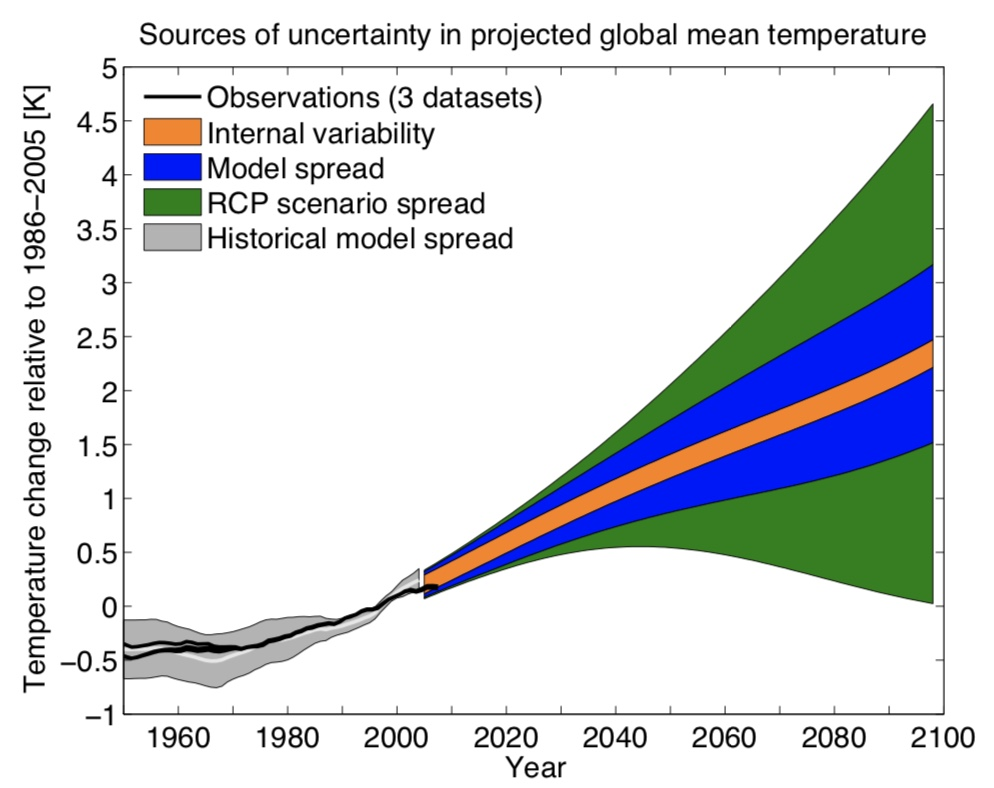

Ou encore celle ci, qui ressemble le plus à nos données (les relevés commencent fin du 19ième siècle), trouvable sur https://www.climate.gov/news-features/understanding-climate/climate-change-global-temperature-projections :
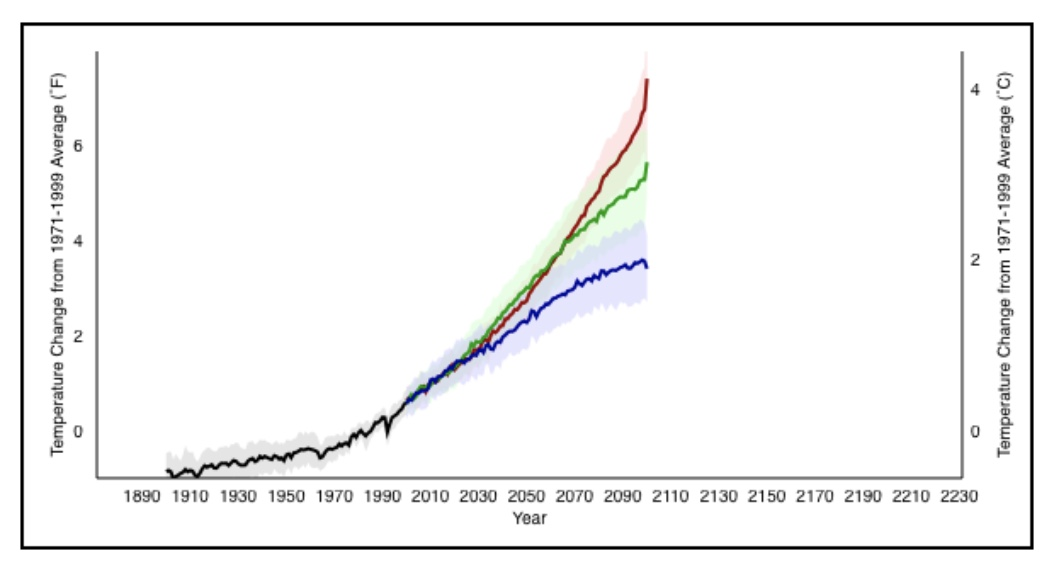 

> Ainsi, nous remarquons que nos prévisions ne sont pas du tout aberrantes. Les comparatifs ne sont pas exactement les mêmes, mais globalement nous trouvons les mêmes conclusions, qui sont une augmentation significative des températures océaniques en culminant en Décembre 2049 aux alentours de +2 degrés environ.

**----------------------------------------------------------------------------------------------------------------------------------------------------------**

**----------------------------------------------------------------------------------------------------------------------------------------------------------**

<center><h1> BIBLIOGRAPHIE </h1></center>

http://www.i3s.unice.fr/~crescenz/publications/Florence/introduction-series-chronologiques_chapitre-1.pdf


https://medium.com/@sigmundojr/seasonality-in-python-additive-or-multiplicative-model-d4b9cf1f48a7


https://www.actuia.com/actualite/les-series-temporelles-preparation-et-exploration-des-donnees/


https://mrmint.fr/outliers-machine-learning


https://medium.com/epidemium/s%C3%A9rie-temporelle-analyse-et-extrapolation-97b4e7a7efd0


https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/


https://otexts.com/fpp2/stationarity.html


https://machinelearningmastery.com/time-series-data-stationary-python/


https://machinelearningmastery.com/difference-time-series-dataset-python/


http://www.statsmodels.org/dev/examples/notebooks/generated/tsa_arma_0.html


https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/


http://perso.ens-lyon.fr/lise.vaudor/autocorrelation-de-series-temporelles-ou-spatiales/


http://www.statsmodels.org/dev/examples/notebooks/generated/tsa_arma_0.html


https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/


https://pythondata.com/forecasting-time-series-autoregression/


https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/